# Matplotlib数据可视化
---

## 1. 基础可视化操作

[快速入门](https://www.runoob.com/w3cnote/matplotlib-tutorial.html)

### 1.1 图表构成

Matplotlib的图表组成元素：
1. **图表对象：Figure**, 即整个图表，也是绘图空间，也称为**画布**，包含了所有子图和一些“特殊”艺术家（标题，图例等）对象。一个图表可以有任意数量的Axes，但至少有一个才有用。
2. **坐标系对象：Axes**, 即Axes子图对象，也称为一个plot，是具有数据空间的图像区域。一个图表中可以包含多个Axes，但给定的Axes对象只能在一个图表中。 Axes包含两个（或3D的三个）坐标轴Axis对象（注意Axes和Axis之间的差异），如x轴（Axes.xaxis）和y轴（Axes.yaxis）。 每个Axes都有一个标题（通过set_title()方法设置），一个x标签（通过set_xlabel()设置）和一个y标签（通过set_ylabel()设置）。
3. **坐标轴对象：Axis**, 类似数字标线的对象。 它们负责设置图像限制并生成刻度线（轴上的标记）和ticklabels（标记刻度线的字符串）。 刻度的位置由定位器（Locator）对象确定，ticklabel字符串由Formatter格式化。 正确的定位器和格式化器的组合可以非常精确地控制刻度位置和标签。
4. **艺术家对象：Artist**，图表及其构成元素的统称，包括图表，轴和轴对象。除此之外，还有Text对象，Line2D对象，集合对象，Patch对象等等。 渲染图形时，所有艺术家对象都被绘制到画布上。 大多数艺术家对象都与轴有关，这样的艺术家不能被多个轴共享，也不能从一个轴移动到另一个轴。

图表基本组成元素如下图所示：

![图表的组成元素](images/anatomy.webp)

创建图表的最简单方法是使用pyplot, 示例代码如下：

In [8]:
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure()  # an empty figure with no axes
fig.suptitle('No axes on this figure')  # Add a title so we know which it is

Text(0.5, 0.98, 'No axes on this figure')

<Figure size 432x288 with 0 Axes>

由于空图表没有坐标轴，所以无法在notebook上显示。为了看到空的图表对象，请在ipython中执行上述代码。

### 1.2 图表划分与布局

可以将图表（画布）划分为一个或多个子图（子画布），这些子图（Axes或plot）构成绘图区域，从而在不同的绘图区域分别绘制不同的图形。

#### 子图函数

1. 使用subplot()函数绘制网格区域中几何形状相同的子区布局。下列代码绘制一个1行2列的子区，然后在两个子区上分别绘制正弦曲线和余弦曲线：

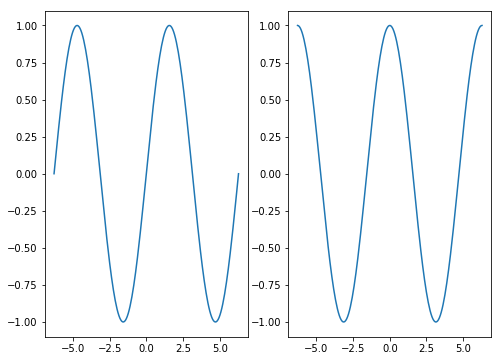

In [3]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace( -2 * np.pi, 2 * np.pi, 200)
y1 = np.sin(x)
y2 = np.cos(x)

plt.figure(figsize=(8,6))

plt.subplot(121) # <=> plt.subplot(1, 2, 1) 
plt.plot(x, y1)

plt.subplot(122)
plt.plot(x, y2)

plt.show()

2. 使用add_subplot()函数在非等分图表的绘图区域上进行图形展示

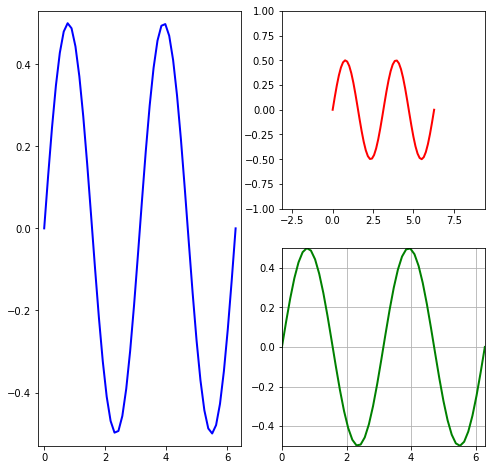

In [27]:
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize=(8,8))

x = np.linspace(0.0, 2 * np.pi)
y = np.cos(x) * np.sin(x)

ax1 = fig.add_subplot(121)
ax1.margins(0.03)
ax1.plot(x, y, ls='-', lw=2, color='b')

ax2 = fig.add_subplot(222)
ax2.margins(0.5, 0.5)
ax2.plot(x, y, ls='-', lw=2, color='r')

ax3 = fig.add_subplot(224)
ax3.margins(x=0, y=0)
ax3.grid(True)
ax3.plot(x, y, ls='-', lw=2, color='g')

plt.show()

In [6]:
help(ax3.margins)

Help on method margins in module matplotlib.axes._base:

margins(*margins, x=None, y=None, tight=True) method of matplotlib.axes._subplots.AxesSubplot instance
    Set or retrieve autoscaling margins.
    
    The padding added to each limit of the axes is the *margin*
    times the data interval. All input parameters must be floats
    within the range [0, 1]. Passing both positional and keyword
    arguments is invalid and will raise a TypeError. If no
    arguments (positional or otherwise) are provided, the current
    margins will remain in place and simply be returned.
    
    Specifying any margin changes only the autoscaling; for example,
    if *xmargin* is not None, then *xmargin* times the X data
    interval will be added to each end of that interval before
    it is used in autoscaling.
    
    Parameters
    ----------
    args : float, optional
        If a single positional argument is provided, it specifies
        both margins of the x-axis and y-axis limits. If two

3. 使用subplot2grid()函数让子图跨越固定的网格布局

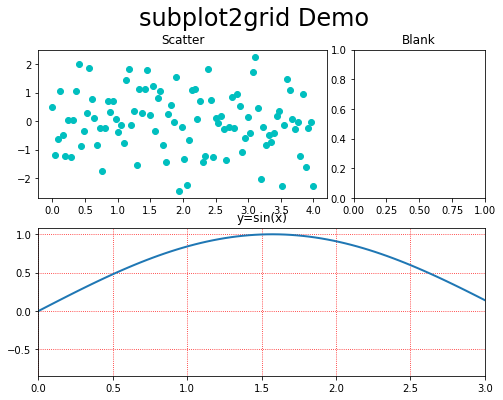

In [9]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(8, 6))
plt.subplot2grid((2,3), (0,0), colspan=2)
x = np.linspace(0.0, 4.0, 100)
y = np.random.randn(100)
plt.scatter(x, y, c='c')
plt.title('Scatter')

plt.subplot2grid((2,3), (0,2))
plt.title('Blank')

plt.subplot2grid((2,3), (1,0), colspan=3)
x = np.linspace(0.0, 4.0, 100)
y = np.sin(x)
plt.plot(x, y, lw=2, ls='-')
plt.xlim(0, 3)
plt.grid(True, ls=':', c='r')
plt.title('y=sin(x)')
# 图表标题
plt.suptitle('subplot2grid Demo', fontsize=24)

plt.show()

4. 使用subplots()函数创建包含一个或多个子区的图表。该函数返回一个Figure实例及其包含的Axes对象或数组。

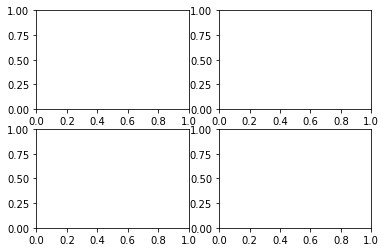

In [32]:
fig, axs = plt.subplots(2, 2)  # a figure with a 2x2 grid of Axeaxs[0,0]
#axs
plt.show()

或者

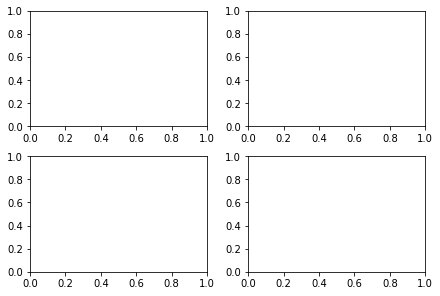

In [10]:
fig, axs = plt.subplots(nrows=2, ncols=2, constrained_layout=True)
plt.show()

In [6]:
type(fig), type(axs)

(matplotlib.figure.Figure, numpy.ndarray)

**案例1:创建包含一个子图的图表**

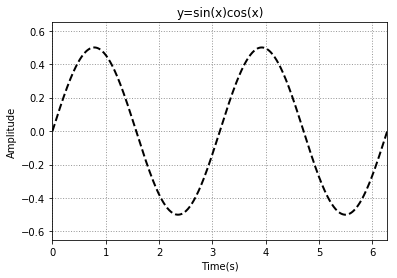

In [11]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0, 2 * np.pi, 500)
y = np.sin(x) * np.cos(x)

fig, ax = plt.subplots(1,1) # <=> plt.subplots()
ax.plot(x, y, 'k--', lw=2)
ax.set_xlabel('Time(s)')
ax.set_ylabel('Amplitude')
ax.set_title('y=sin(x)cos(x)')

ax.set_xlim(0, 2*np.pi)
ax.set_ylim(-0.65, 0.65)

ax.grid(ls=':', lw=1, color='gray', alpha=0.8)

plt.show()

**案例2：创建包含两个子图的图表** 

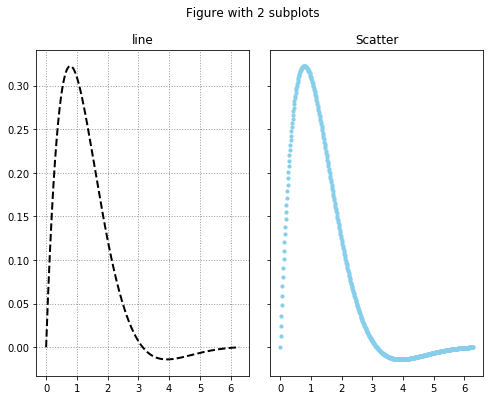

In [33]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0, 2 * np.pi, 500)
y = np.sin(x)*np.exp(-x)

fig, axs = plt.subplots(1, 2, sharey = True, figsize=(8,6)) # 共享y轴

axs[0].plot(x, y, 'k--', lw=2)
axs[0].set_title('line') # 子图标题
axs[0].grid(ls=':', lw=1, color='gray', alpha=0.8)

axs[1].scatter(x, y, s=10, c='skyblue', marker='o')
axs[1].set_title('Scatter') # 子图标题
# 调整水平间距
plt.subplots_adjust(wspace=0.1)
# 图表标题
plt.suptitle('Figure with 2 subplots')

plt.show()

**案例3:使用包含多个子图的图表实现多种统计图形的组合展示**

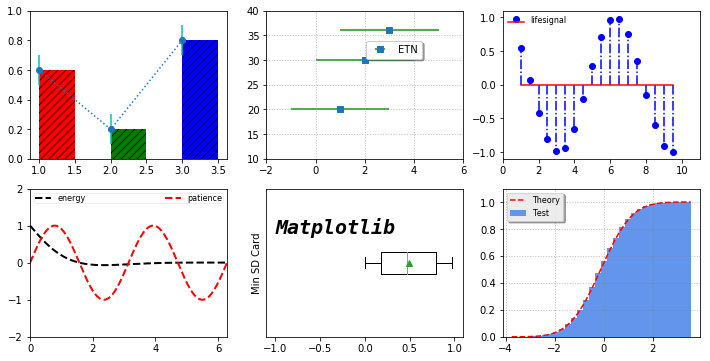

In [48]:
import numpy as np
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 3, figsize=(12, 6)) # 2行3列,6个子图

# 相当于subplot(231)
colors = ['r','g','b']
axs[0,0].bar([1, 2, 3], [0.6, 0.2, 0.8], 
             color=colors, width=0.5, 
             hatch='///', align='edge')
axs[0,0].errorbar([1, 2, 3],[0.6, 0.2, 0.8],
             yerr=0.1, capsize=0, ecolor='c', fmt='o:')
axs[0,0].set_ylim(0, 1.0)

# subplot(232)
axs[0,1].errorbar([1, 2, 3], [20, 30, 36], 
             xerr=2, ecolor='#4daf4a', elinewidth=2, fmt='s', label='ETN')
axs[0,1].legend(loc=3, fancybox=True, shadow=True, fontsize=10, borderaxespad=10)
axs[0,1].set_ylim(10,40)
axs[0,1].set_xlim(-2, 6)
axs[0,1].grid(ls=':', lw=1, color='grey', alpha=0.5)

# subplot(233)
x = np.arange(1, 10, 0.5)
y = np.cos(x)
axs[0,2].stem(x, y, basefmt='r-', linefmt='b-.', markerfmt='bo', label='lifesignal')
axs[0,2].legend(loc=2, fontsize=8, frameon=False, borderpad=0.0, borderaxespad=0.6)
axs[0,2].set_xlim(0,11)
axs[0,2].set_ylim(-1.1, 1.1)

# subplot(234)
x1 = np.linspace(0, 2 * np.pi, 500)
x2 = np.linspace(0, 2 * np.pi, 1000)
y1 = np.cos(x1) * np.exp(-x1)
y2 = np.sin(2 * x2)

line1, line2, = axs[1,0].plot(x1, y1, 'k--', x2, y2, 'r--', lw=2)
axs[1,0].legend((line1, line2), ('energy','patience'), 
               loc='upper center', fontsize=8, ncol=2,
               framealpha=0.3, mode='expand', 
               columnspacing=2, borderpad=0.1)
axs[1,0].set_ylim(-2, 2)
axs[1,0].set_xlim(0, 2*np.pi)

# subplot(235)
x = np.random.rand(100)
axs[1,1].boxplot(x, vert=False, showmeans=True, meanprops=dict(color='g'))
axs[1,1].set_yticks([])
axs[1,1].set_xlim(-1.1, 1.1)
axs[1,1].set_ylabel('Min SD Card')
axs[1,1].text(-1.0, 1.2, 'Matplotlib', 
              fontsize=20, 
              style='italic', 
              weight='black', 
              family='monospace')

# subplot(236)
mu = 0.0
sigma = 1.0

x = np.random.randn(10000)
n, bins, patches = axs[1,2].hist(x, bins=30, histtype='stepfilled',
                               cumulative=True,
                               density=True,
                               color='cornflowerblue',
                               label='Test')

y = (1 / (np.sqrt(2 * np.pi) * sigma)) * np.exp(-0.5 * (1 / sigma * (bins - mu)) ** 2)
y = y.cumsum()
y /= y[-1]

axs[1,2].plot(bins, y, 'r--', linewidth=1.5, label='Theory')
axs[1,2].set_ylim(0.0, 1.1)
axs[1,2].grid(ls=':', lw=1, color='grey', alpha=0.5)
axs[1,2].legend(loc='upper left', 
               fontsize=8, 
               shadow=True, 
               fancybox=True, 
               framealpha=0.8)
plt.subplots_adjust()

plt.show()

In [40]:
#

5. 通过gridspec模块中的GridSpec实例创建图表

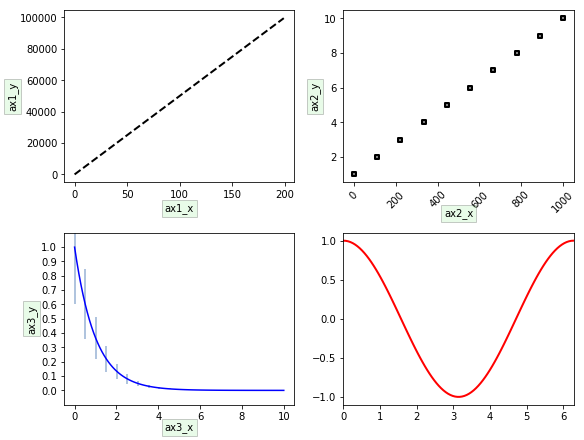

In [69]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

fig2 = plt.figure(figsize=(8,6), constrained_layout=True)
spec2 = GridSpec(ncols=2, nrows=2, figure=fig2)

box = {'facecolor':'lightgreen', 'pad':3, 'alpha':0.2}

x = np.arange(0, 1e5, 500)
f2_ax1 = fig2.add_subplot(spec2[0, 0])
f2_ax1.plot(x, 'k--', lw=2)
f2_ax1.set_xlabel('ax1_x', bbox=box)
f2_ax1.set_ylabel('ax1_y', bbox=box)
f2_ax1.yaxis.set_label_coords(-0.2, 0.5)

x = np.linspace(0, 1000, 10)
y = np.arange(1, 11, 1)
f2_ax2 = fig2.add_subplot(spec2[0, 1])
f2_ax2.scatter(x, y, s=20, c='grey', marker='s', lw=2, edgecolors='k')
f2_ax2.set_ylabel('ax2_y', bbox=box)
f2_ax2.set_xlabel('ax2_x', bbox=box)
for tick_label in f2_ax2.get_xticklabels():
    tick_label.set_rotation(45)
f2_ax2.yaxis.set_label_coords(-0.1, 0.5)
f2_ax2.xaxis.set_label_coords(0.5, -0.15)

x = np.linspace(0, 10, 100)
y = np.exp(-x)
f2_ax3 = fig2.add_subplot(spec2[1, 0])
f2_ax3.errorbar(x, y, fmt='b-', yerr=0.4 * y, 
                ecolor='lightsteelblue', 
                elinewidth=2, 
                capsize=0, errorevery=5)
f2_ax3.set_xlabel('ax3_x', bbox=box)
f2_ax3.set_ylabel('ax3_y', bbox=box)
f2_ax3.xaxis.set_label_coords(0.5, -0.1)
f2_ax3.set_ylim(-0.1, 1.1)
f2_ax3.set_yticks(np.arange(0, 1.1, 0.1))

x = np.linspace(0, 2 * np.pi, 100)
y = np.cos(x)
f2_ax4 = fig2.add_subplot(spec2[1, 1])
f2_ax4.plot(x, y, lw=2, ls='-', c='r')
f2_ax4.set_xlim(0, 2 * np.pi)
f2_ax4.set_ylim(-1.1, 1.1)
spec2.tight_layout(fig2)
plt.show()

虽然对于2行2列网格，使用GridSpec比较繁琐，但具有更大的灵活性。GridSpec的强大之处在于能够方便地创建跨越行和列的子图，并通过Numpy切片语法选择每个子图所占用的GridSpec单元格区域。示例代码如下：

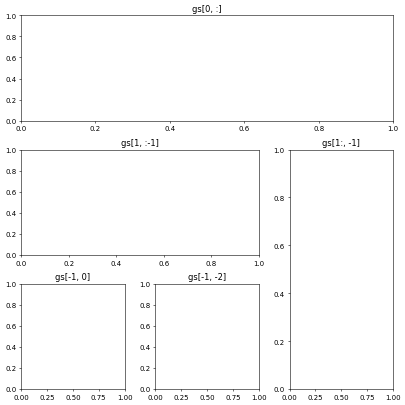

In [29]:
fig3 = plt.figure(constrained_layout=True, figsize=(8,8), dpi=50)
# 在图表中添加3*3网格
gs = fig3.add_gridspec(3, 3)

f3_ax1 = fig3.add_subplot(gs[0, :])
f3_ax1.set_title('gs[0, :]')

f3_ax2 = fig3.add_subplot(gs[1, :-1])
f3_ax2.set_title('gs[1, :-1]')

f3_ax3 = fig3.add_subplot(gs[1:, -1])
f3_ax3.set_title('gs[1:, -1]')

f3_ax4 = fig3.add_subplot(gs[-1, 0])
f3_ax4.set_title('gs[-1, 0]')

f3_ax5 = fig3.add_subplot(gs[-1, -2])
f3_ax5.set_title('gs[-1, -2]')

plt.show()

可见，GridSpec相当于把整个图表划分为n行m列的网格，然后用Numpy索引和切片为子图分配一个或多个单元格。如下列示例代码将2行2列的网格分配给3个子图：

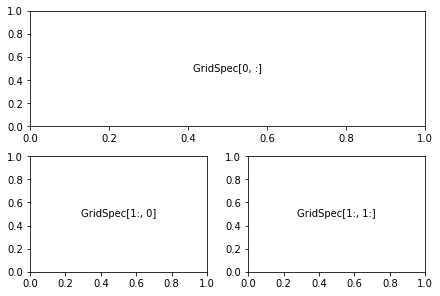

In [18]:
fig4 = plt.figure(constrained_layout=True)

spec4 = fig4.add_gridspec(ncols=2, nrows=2)
# 注解选项
anno_opts = dict(xy=(0.5, 0.5), xycoords='axes fraction',
                 va='center', ha='center')

f4_ax1 = fig4.add_subplot(spec4[0, :])
f4_ax1.annotate('GridSpec[0, :]', **anno_opts)

fig4.add_subplot(spec4[1, 0]).annotate('GridSpec[1:, 0]', **anno_opts)
fig4.add_subplot(spec4[1, 1]).annotate('GridSpec[1:, 1:]', **anno_opts)
plt.show()

也可以通过使用宽度比(width_ratios)和高度比(height_ratios)关键字参数设置网格宽度和高度占整个图表宽度和高度的比例。如：

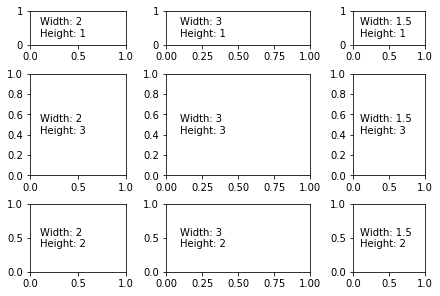

In [20]:
fig5 = plt.figure(constrained_layout=True)
widths = [2, 3, 1.5]
heights = [1, 3, 2]
spec5 = fig5.add_gridspec(ncols=3, nrows=3, width_ratios=widths,
                          height_ratios=heights)
for row in range(3):
    for col in range(3):
        ax = fig5.add_subplot(spec5[row, col])
        label = 'Width: {}\nHeight: {}'.format(widths[col], heights[row])
        ax.annotate(label, (0.1, 0.5), xycoords='axes fraction', va='center')

GridSpec所接受的任何参数（如width_ratios和height_ratios）都可以通过gridspec_kw参数传递给subplots(),这样就不需要显式地创建GridSpec对象而控制图表的布局了。如上述代码等价于：

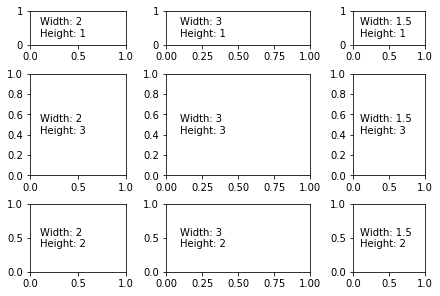

In [21]:
gs_kw = dict(width_ratios=widths, height_ratios=heights)
fig6, f6_axes = plt.subplots(ncols=3, nrows=3, constrained_layout=True,
        gridspec_kw=gs_kw)
for r, row in enumerate(f6_axes):
    for c, ax in enumerate(row):
        label = 'Width: {}\nHeight: {}'.format(widths[c], heights[r])
        ax.annotate(label, (0.1, 0.5), xycoords='axes fraction', va='center')

可以结合子图和get_gridspec方法，删除一些子图并将它们组合起来创建特殊布局。如：

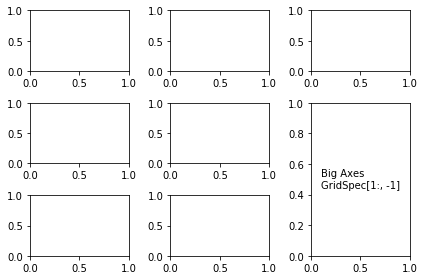

In [22]:
fig7, f7_axs = plt.subplots(ncols=3, nrows=3)
gs = f7_axs[1, 2].get_gridspec()
# remove the underlying axes
for ax in f7_axs[1:, -1]:
    ax.remove()
axbig = fig7.add_subplot(gs[1:, -1])
axbig.annotate('Big Axes \nGridSpec[1:, -1]', (0.1, 0.5),
               xycoords='axes fraction', va='center')

fig7.tight_layout()

#### 微调布局

显式使用GridSpec时，可以调整从GridSpec创建的子图的布局参数。 不过这些参数与constrained_layout或Figure.tight_layout不兼容，后者会自动调整子图大小以填充整个图表。如：

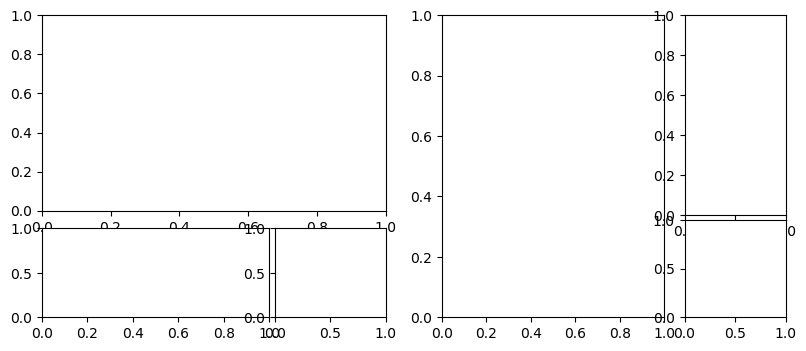

In [28]:
fig9 = plt.figure(figsize=(8, 4), dpi = 100, constrained_layout=False)
gs1 = fig9.add_gridspec(nrows=3, ncols=3, left=0.05, right=0.48,
                        wspace=0.05)
f9_ax1 = fig9.add_subplot(gs1[:-1, :])
f9_ax2 = fig9.add_subplot(gs1[-1, :-1])
f9_ax3 = fig9.add_subplot(gs1[-1, -1])

gs2 = fig9.add_gridspec(nrows=3, ncols=3, left=0.55, right=0.98,
                        hspace=0.05)
f9_ax4 = fig9.add_subplot(gs2[:, :-1])
f9_ax5 = fig9.add_subplot(gs2[:-1, -1])
f9_ax6 = fig9.add_subplot(gs2[-1, -1])

#### 约束布局

constrained_layout自动调整子图和各种装饰，如标题、图例和色条等，以便它们适合图表窗口，同时仍尽可能保留用户指定的逻辑布局。
在将Axes子图添加到图表之前，需要激活constrained_layout。 有两种方法：

1. 使用subplots()或figure()的函数参数：`plt.subplots(constrained_layout=True)`
2. 或者`mpl.rcParams['figure.constrained_layout.use'] = True`全局参数

示例代码如下：

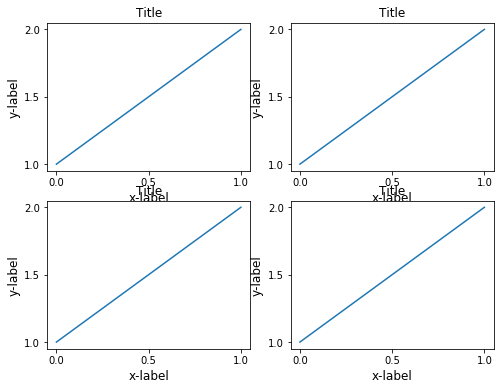

In [36]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.gridspec as gridspec
import numpy as np

plt.rcParams['savefig.facecolor'] = "0.8"
plt.rcParams['figure.figsize'] = 8, 6

def example_plot(ax, fontsize=12, nodec=False):
    ax.plot([1, 2])

    ax.locator_params(nbins=3)
    if not nodec:
        ax.set_xlabel('x-label', fontsize=fontsize)
        ax.set_ylabel('y-label', fontsize=fontsize)
        ax.set_title('Title', fontsize=fontsize)
    else:
        ax.set_xticklabels('')
        ax.set_yticklabels('')


fig, axs = plt.subplots(2, 2, constrained_layout=False)
for ax in axs.flat:
    example_plot(ax)

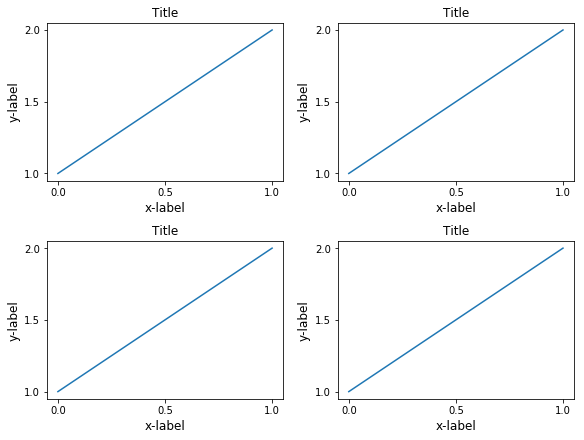

In [37]:
fig, axs = plt.subplots(2, 2, constrained_layout=True)
for ax in axs.flat:
    example_plot(ax)

#### 紧密布局

tight_layout自动调整子图参数，以便子图符合图表区域。 这是一个实验性功能，可能不适用于某些情况。 它仅检查刻度标签，轴标签和标题的范围。

tight_layout的替代方法是constrained_layout。

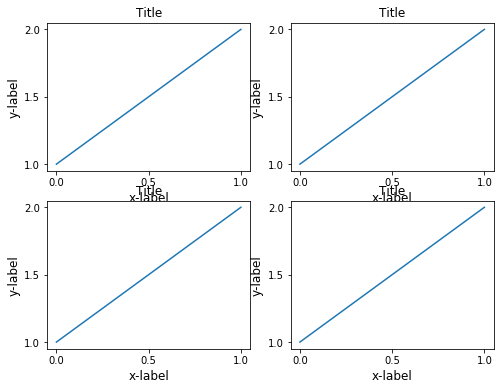

In [42]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2)
example_plot(ax1)
example_plot(ax2)
example_plot(ax3)
example_plot(ax4)
plt.show()

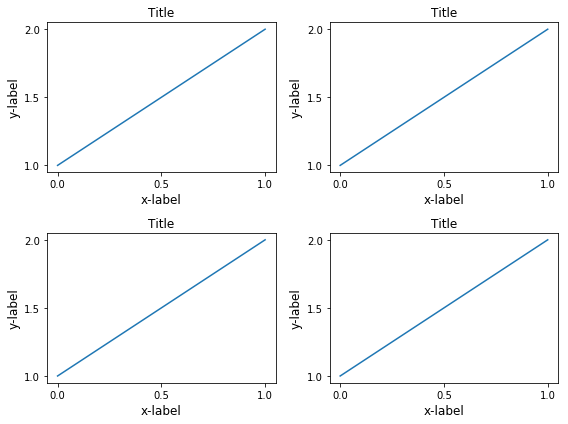

In [43]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2)
example_plot(ax1)
example_plot(ax2)
example_plot(ax3)
example_plot(ax4)
plt.tight_layout()
plt.show()

#### 细分子图

可以使用GridSpec对象的subgridspec对子图网格的单元格进一步细分：

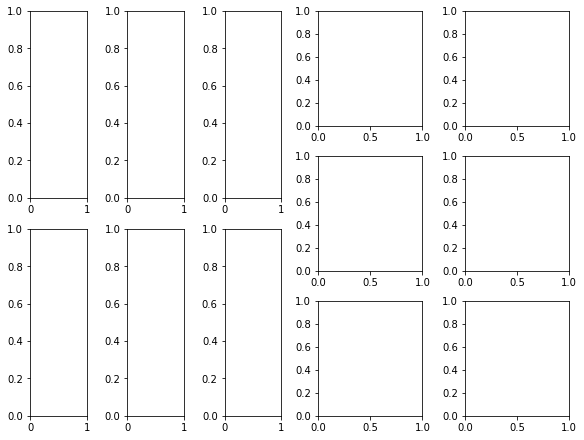

In [49]:
fig10 = plt.figure(figsize=(8, 6), constrained_layout=True)
gs0 = fig10.add_gridspec(1, 2)

gs00 = gs0[0].subgridspec(2, 3)
gs01 = gs0[1].subgridspec(3, 2)

for a in range(2):
    for b in range(3):
        fig10.add_subplot(gs00[a, b])
        fig10.add_subplot(gs01[b, a])

subplotspec也可用来创建复杂嵌套的gridspec。代码示例如下：

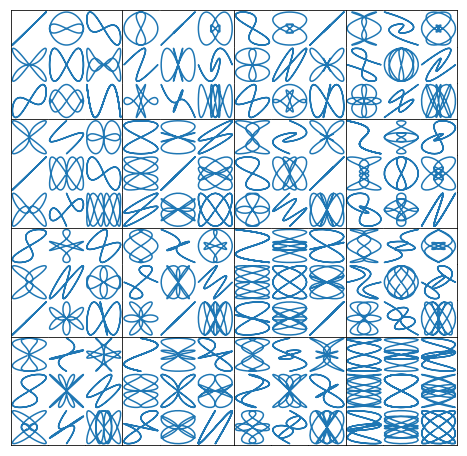

In [31]:
import numpy as np
from itertools import product

def squiggle_xy(a, b, c, d, i=np.arange(0.0, 2*np.pi, 0.05)):
    return np.sin(i*a)*np.cos(i*b), np.sin(i*c)*np.cos(i*d)

fig11 = plt.figure(figsize=(8, 8), constrained_layout=False)
# gridspec inside gridspec
outer_grid = fig11.add_gridspec(4, 4, wspace=0.0, hspace=0.0)

for i in range(16):
    inner_grid = outer_grid[i].subgridspec(3, 3, wspace=0.0, hspace=0.0)
    a, b = int(i/4)+1, i % 4+1
    for j, (c, d) in enumerate(product(range(1, 4), repeat=2)):
        ax = fig11.add_subplot(inner_grid[j])
        ax.plot(*squiggle_xy(a, b, c, d))
        ax.set_xticks([])
        ax.set_yticks([])
        fig11.add_subplot(ax)

all_axes = fig11.get_axes()

# show only the outside spines
for ax in all_axes:
    for sp in ax.spines.values():
        sp.set_visible(False)
    if ax.is_first_row():
        ax.spines['top'].set_visible(True)
    if ax.is_last_row():
        ax.spines['bottom'].set_visible(True)
    if ax.is_first_col():
        ax.spines['left'].set_visible(True)
    if ax.is_last_col():
        ax.spines['right'].set_visible(True)

plt.show()

### 1.3 图表颜色

#### 颜色参数
颜色参数的取值有4种模式：
1. 英文缩写的基本颜色：r（红），g（绿），b（蓝），c（青），m（洋红），y（黄），k（黑），w（白）
2. Hex模式的#RRGGBB字符串：#FF0000, #00FF00, #0000FF
3. Web模式的颜色名：red, green, blue, cyan, magenta, yellow, black, white
4. 十进制模式并归一化到\[0,1\]的(R,G,B)元组：(1,0,0), (0,1,0), (0,0,1)

以下代码通过极坐标下的柱状图，展示了不同模式颜色参数的用法：

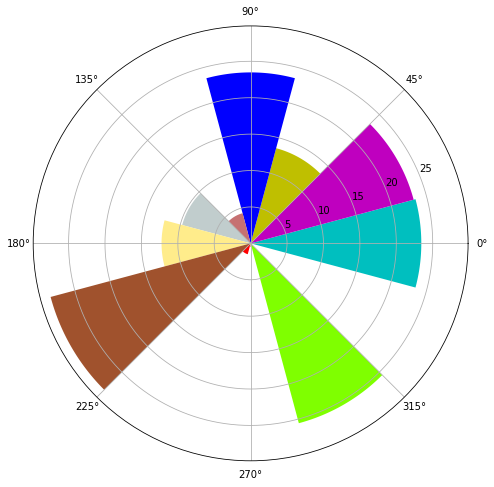

In [3]:
import matplotlib.pyplot as plt
import numpy as np

bar_slices = 12

theta = np.linspace(0.0, 2 * np.pi, bar_slices, endpoint=False)
radii = 30 * np.random.rand(bar_slices)
width = 2 * np.pi / bar_slices

colors = np.array(['c','m','y','b', 
                   '#c67172', '#C1CDCD', '#FFEC8B', '#A0522D', 
                   'red', 'burlywood', 'chartreuse', 'green'])
fig = plt.figure(figsize=(8,8), facecolor='w')
ax = fig.add_subplot(111, polar=True)

bars = ax.bar(theta, radii, width=width, color=colors, bottom=0.0)

plt.show()

#### 颜色映射表
1. 获取内置颜色映射表

Matplotlib提供了很多颜色映射表，可以通过matplotlib.pyplot.colormaps()函数获得全部可用的颜色映射表。其中，名称后缀为“_r"为反转的颜色映射表。如：

In [36]:
gradient = np.linspace(0, 1, 256)
gradient = np.vstack((gradient, gradient))

def plot_color_gradients(cmap_category, cmap_list, nrows):
    
    fig, axes = plt.subplots(nrows=nrows, figsize=(8, 12))
    fig.subplots_adjust(top=0.95, bottom=0.01, left=0.2, right=0.99)
    axes[0].set_title(cmap_category + ' colormaps', fontsize=14)

    for ax, name in zip(axes, cmap_list):
        ax.imshow(gradient, aspect='auto', cmap=plt.get_cmap(name)) # 按名称获取颜色映射表
        pos = list(ax.get_position().bounds)
        x_text = pos[0] - 0.01
        y_text = pos[1] + pos[3]/2.
        fig.text(x_text, y_text, name, va='center', ha='right', fontsize=16)

    # Turn off *all* ticks & spines, not just the ones with colormaps.
    for ax in axes:
        ax.set_axis_off()

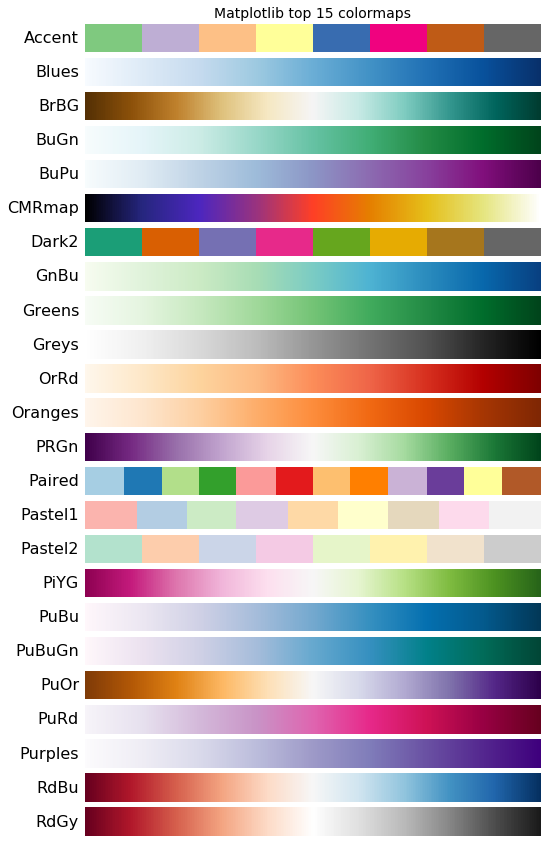

In [38]:
import matplotlib.pyplot as plt
cmaps = plt.colormaps() # 获取全部可用的颜色映射表
cmaps = filter(lambda s: s[-2:]!='_r', cmaps)
plot_color_gradients('Matplotlib top 24', cmaps, 24)
plt.show()

2. 通过关键字参数使用颜色映射表
可以在调用imshow(), pcolor(), scatter()等方法绘制图形时设置颜色映射表。如：

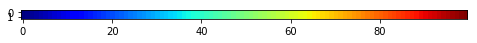

In [53]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

def plot_cmap(cmap=None):
    plt.figure(figsize=(8,1))
    x = np.linspace(0, 1, 100)
    x = np.vstack((x, x))
    if cmap is None:
        plt.imshow(x)
    else:
        plt.imshow(x, cmap=cmap)
    plt.show()

plot_cmap(cm.jet)

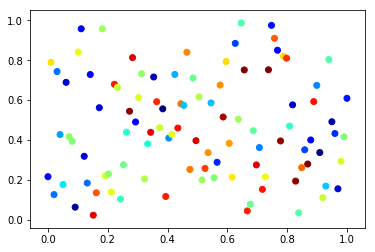

In [52]:
x = np.linspace(0, 1, 100)
plt.scatter(x, np.random.rand(100), c=np.random.rand(100), cmap=cm.jet)
plt.show()

3. 使用matplotlib.pyplot.set_cmap()函数设置颜色映射表。如：

<Figure size 432x288 with 0 Axes>

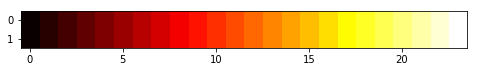

In [57]:
plt.set_cmap('hot')
plot_cmap()

#### 综合案例

1. 案例1: 模拟图的颜色使用模式

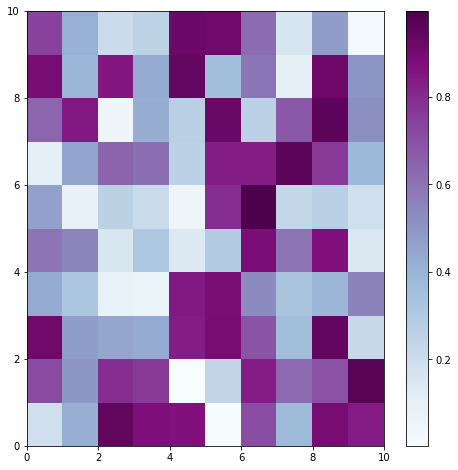

In [63]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(8,8))
rd = np.random.rand(10, 10)
plt.pcolor(rd, cmap='BuPu')
plt.colorbar()

plt.show()

2. 案例2: 散点图的颜色使用模式

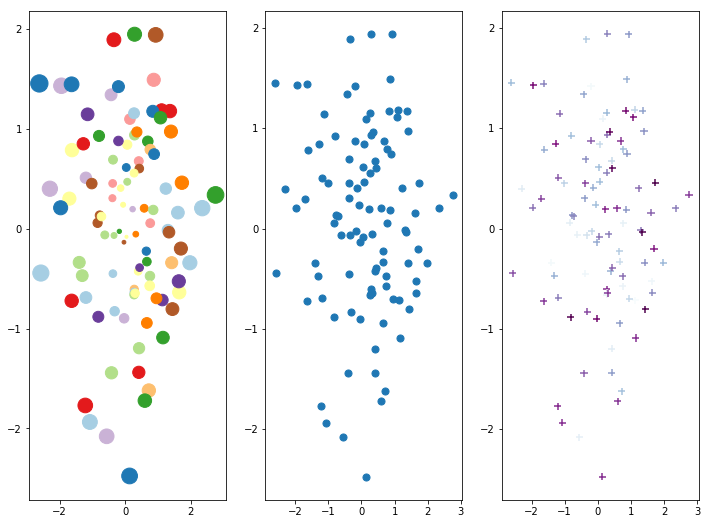

In [54]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm

x = np.random.randn(100)
y = np.random.randn(100)

exponent = 2

plt.figure(figsize=(12, 9))

plt.subplot(131)
plt.scatter(x, y, np.sqrt(np.power(x, exponent) + np.power(y, exponent)) * 100,
            c=np.random.rand(100), cmap=cm.Paired, marker='o')

plt.subplot(132)
plt.scatter(x, y, 50, marker='o')

plt.subplot(133)
plt.scatter(x, y, 50, c=np.random.rand(100), cmap=cm.BuPu, marker='+')

plt.show()


3. 案例3:极轴图的颜色使用模式

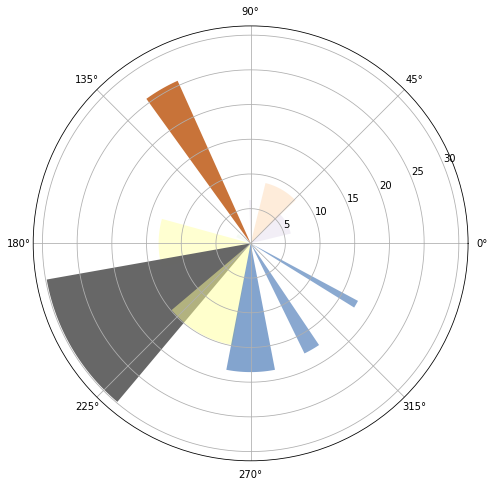

In [68]:
import matplotlib.pyplot as plt
import numpy as np

bar_slices = 12

theta = np.linspace(0.0, 2 * np.pi, bar_slices, endpoint=False)
radii = 30 * np.random.rand(bar_slices)
width = np.pi / 4 * np.random.rand(bar_slices)

fig = plt.figure(figsize=(8,8), facecolor='w')
ax = fig.add_subplot(111, polar=True)

bars = ax.bar(theta, radii, width=width, bottom=0.0)

for r, bar in zip(radii, bars):
    bar.set_facecolor(cm.Accent(r / 30.0))
    bar.set_alpha(r / 30.0)

plt.show()

4. 案例4:等高线的颜色使用模式

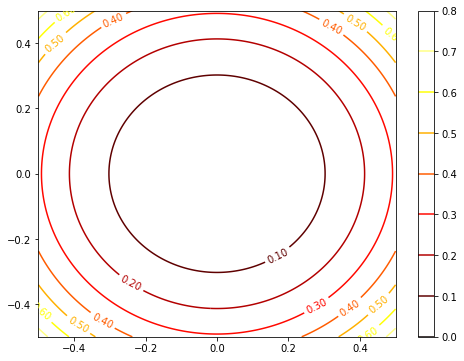

In [72]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(-0.5, 0.5, 1000)
x, y = np.meshgrid(x, x)

fig, ax = plt.subplots(1, 1, figsize=(8, 6))
z= x**2 + y**2 + np.power(x**2 + y**2, 2)

cs = plt.contour(x, y, z, cmap=cm.hot)

plt.clabel(cs, fmt='%3.2f')

plt.colorbar(cs)

plt.show()

5. 案例5:颜色标尺的颜色使用模式

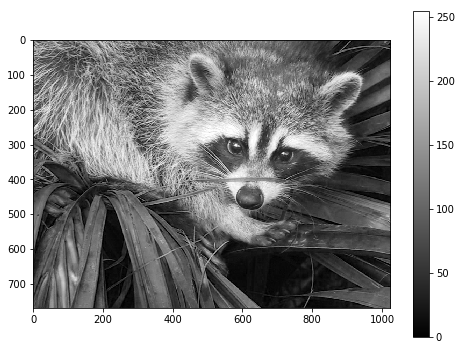

In [23]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import scipy.misc

ascent = scipy.misc.face()
ascent = ascent[:,:,2]
plt.figure(figsize=(8,6))
plt.imshow(ascent, cm.gray)
plt.colorbar()

plt.show()

In [13]:
ascent[:,:,0].shape

(768, 1024)

### 1.4 线型与标记

#### 线型

下列示例代码输出了所有线型：

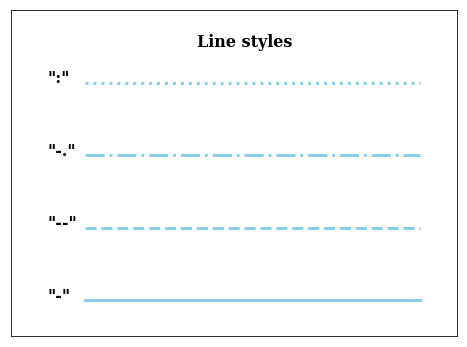

In [19]:
import matplotlib.pyplot as plt
import numpy as np

font_style = dict(family='serif', color='black', weight='black', size=16)
color = 'skyblue'
linewidth = 3

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)

linestyles = ['-', '--', '-.', ':']

x = np.arange(1, 11, 1)
y = np.linspace(1, 1, 10)

ax.text(4, 4.0, 'Line styles', **font_style)

for i, ls in enumerate(linestyles):
    ax.text(0, i + 0.5, '"{}"'.format(ls), **font_style)
    ax.plot(x, (i + 0.5) * y, linestyle=ls, color=color, linewidth=linewidth)
    
ax.set_xlim(-1, 11)
ax.set_ylim(0, 4.5)

ax.margins(0.2)
ax.set_xticks([])
ax.set_yticks([])

plt.show()

#### 标记
1. 单一字符模式

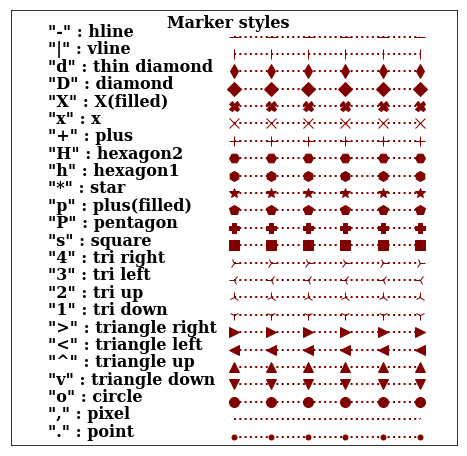

In [100]:
import matplotlib.pyplot as plt
import numpy as np

font_style = dict(family='serif', color='black', weight='black', size=16)
line_marker_style = dict(linestyle=':', linewidth=2, color='maroon', markersize=10)

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)

marker_descs = ['"." : point', 
               '"," : pixel',
               '"o" : circle',
               '"v" : triangle down',
               '"^" : triangle up',
               '"<" : triangle left',
               '">" : triangle right',
               '"1" : tri down',
               '"2" : tri up',
               '"3" : tri left',
               '"4" : tri right',
               '"s" : square',
               '"P" : pentagon',
               '"p" : plus(filled)',
               '"*" : star',
               '"h" : hexagon1',
               '"H" : hexagon2',
               '"+" : plus',
               '"x" : x',
               '"X" : X(filled)',
               '"D" : diamond',
               '"d" : thin diamond',
               '"|" : vline',
               '"-" : hline'
              ]
markers = ['.', ',', 'o', 'v', '^', '<', '>', '1', '2', '3', '4', 's', 
           'P', 'p', '*', 'h', 'H', '+', 'x', 'X', 'D', 'd', '|', '_']
x = np.arange(5, 11, 1)
y = np.linspace(1, 1, 6)

ax.text(3.2, 24, 'Marker styles', **font_style)
for i, marker in enumerate(markers):
    ax.text(0, i + 0.5, marker_descs[i], **font_style)
    ax.plot(x, (i + 0.5) * y, marker=markers[i], **line_marker_style)

ax.set_xlim(-1, 11)
ax.set_ylim(0, 25)
ax.margins(0.3)
ax.set_xticks([])
ax.set_yticks([])

plt.show()

2. mathtext模式

可将关键字参数marker的取值设为mathtext格式的原始字符串。如：

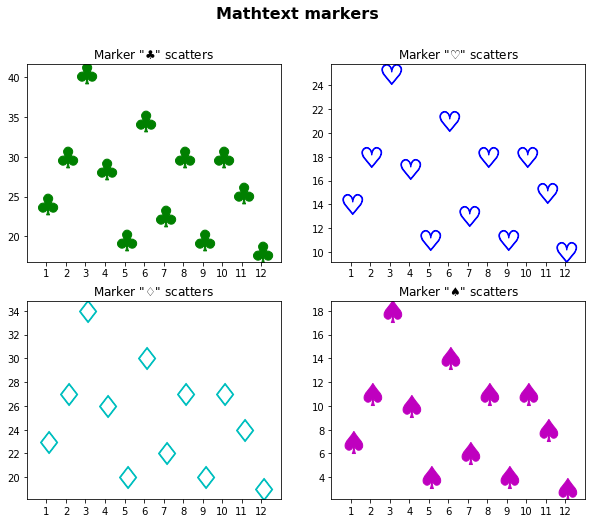

In [111]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(1, 13, 1)
y = np.random.randint(12, 34, 12)

fig, ax = plt.subplots(2, 2, figsize=(10, 8), facecolor='w')

def scatter_mathtext_markers(ax, x, y, mathtext, c='r'):
    ax.scatter(x,y, marker=mathtext, c=c, s=500)
    ax.locator_params(axis='x', tight=True, nbins=11)
    ax.set_xlim(0, 13)
    ax.set_xticks(x)
    ax.set_title('Marker "%s" scatters'% mathtext)
    
scatter_mathtext_markers(ax[0,0], x, y * 1.5, r'$\clubsuit$', c='g')
scatter_mathtext_markers(ax[0,1], x, y - 2, r'$\heartsuit$', c='b')
scatter_mathtext_markers(ax[1,0], x, y + 7, r'$\diamondsuit$', c='c')
scatter_mathtext_markers(ax[1,1], x, y - 9, r'$\spadesuit$', c='m')

plt.suptitle('Mathtext markers', fontsize=16, weight='black')

plt.show()

#### 大小与颜色

1. 线宽和颜色

可以通过绘图函数的关键字参数lw(linewidth)和c(color)来设置线宽和颜色。如：

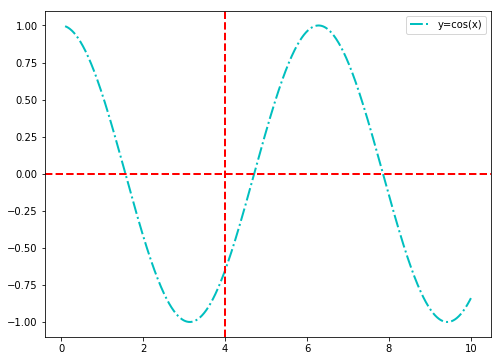

In [120]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(8,6))

x = np.linspace(0.1, 10, 1000)
y = np.cos(x)

plt.plot(x, y, ls='-.', lw=2, c='c', label='y=cos(x)')
#plt.plot(x, y, ls='-.', linewidth=2, color='c', label='y=cos(x)')

plt.axhline(y=0.0, c='r', ls='--', lw=2)
plt.axvline(x=4.0, c='r', ls='--', lw=2)

plt.legend()

plt.show()

2. 标记（散点）的大小和颜色

可以通过绘图函数的关键字参数s和c来设置标记的大小和颜色。如：

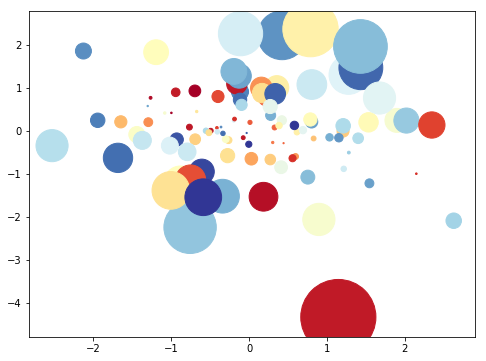

In [125]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm

plt.figure(figsize=(8, 6))
x = np.random.randn(100)
y = np.random.randn(100)

plt.scatter(x, y, s=np.power(10*x + 20*y, 2), 
            c=np.random.rand(100),
            cmap=cm.RdYlBu,
            marker='o')
plt.show()

提示：正如前面示例代码所示，也可以使用样式（字典）来统一设置线条和标记样式。

#### 综合案例

1. 案例1:'--'线型的不同展示形式的设置

NameError: name 'dashes' is not defined

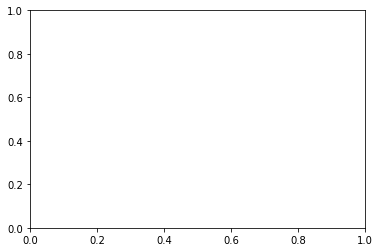

In [71]:
import matplotlib.pyplot as plt
import numpy as np

font_style = dict(family='serif', color='black', weight='black', size=16)

line_marker_styles = [
    dict(linestyle='--', linewidth=2, color='maroon', markersize=10),
    dict(linestyle='--', linewidth=2, color='cornflowerblue', markersize=10),
    dict(linestyle='--', linewidth=2, color='turquoise', markersize=10)
]

fig = plt.figure()
ax = fig.add_subplot(111)

x = np.linspace(0, 2*np.pi, 500)
y = np.sin(x) * np.cos(x)

ax.plot(x, y, dashes)

## 2. 图形绘制

### 2.1 图形元素绘制函数

####  线图

- 函数：plot()
- 用途：展现变量的趋势变化

#### 散点图

- 函数：scatter()
- 用途：寻找变量之间的关系

#### 坐标范围

- 函数：xlim(), ylim()
- 用途：设置坐标的显示范围

#### 文本标签
- 函数：xlabel(), ylabel()
- 用途：设置坐标轴的标签文本

#### 网格
- 函数：grid()
- 用途：绘制刻度线的网格线

#### 参考线
- 函数：axhline(), axvline()
- 用途：绘制平行于坐标轴参考线

#### 参考区
- 函数：axhspan(), axvspan()
- 用途：绘制平行于坐标轴参考区域

#### 注释
- 函数：annotate()
- 用途：绘制指向型注释文本

#### 文本
- 函数：text()
- 用途：在图形的任意位置绘制文本

#### 标题
- 函数：title()
- 用途：在图形内容的标题

#### 图例
- 函数：legend()
- 用途：绘制针对不同图形文本标签的图例

### 2.2 基本统计绘图


#### 柱状图

- 函数：bar()
- 用途：展示x轴向定性（离散）数据的分布特征

#### 条形图
- 函数：barh()
- 用途：展示y轴向定性（离散）数据的分布特征

#### 直方图

- 函数：hist()
- 用途：展示轴向定量（连续）数据的分布特征

#### 饼图

- 函数：pie()
- 用途：展示定性（离散）数据不同类别的百分比

#### 极线图

- 函数：polar()
- 用途：在极坐标系总绘制线图

#### 气泡图

- 函数：scatter()
- 用途：借助散点（气泡）大小展示三维数据

#### 棉棒图

- 函数：stem()
- 用途：展示离散的有序数据

#### 箱线图

- 函数：boxplot()
- 用途：展示数据的统计特征，如中位数，离群值等

#### 误差棒图

- 函数：errorbar()
- 用途：用于展示数据中的测量和试验误差

### 2.3 高级统计绘图

#### 柱状图
- 使用场景：水平方向（x轴）定性数据或离散型数据的分布展示。
- 使用函数：bar()
- 代码示例：

#### 条形图
- 使用场景：垂直方向（y轴）定性数据或离散型数据的分布展示。
- 使用函数：barh()
- 代码示例：

## 3. 高阶优化

### 3.1 图例和标题的添加与修改

#### 添加图例和标题

可通过title()和legend()函数添加图例和标题。示例代码如下：

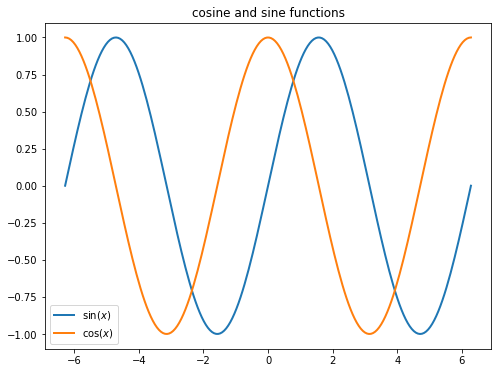

In [239]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-2 * np.pi, 2 * np.pi, 200)
y1 = np.sin(x)
y2 = np.cos(x)

plt.figure(figsize=(8, 6), facecolor='w')

plt.plot(x, y1, ls='-', lw=2, label='$\sin(x)$')
plt.plot(x, y2, ls='-', lw=2, label='$\cos(x)$')
# 添加标题和图例
plt.title('cosine and sine functions')
plt.legend(loc='lower left')

plt.show()

#### 更改图例和标题

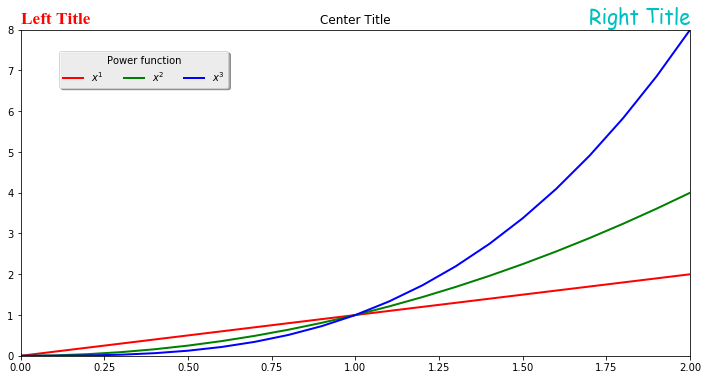

In [258]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(0, 2.1, 0.1)
y1 = np.power(x, 1)
y2 = np.power(x, 2)
y3 = np.power(x, 3)

plt.figure(figsize=(12, 6), facecolor='w')

plt.plot(x, y1, ls='-', lw=2, c='r', label='$x^{1}$')
plt.plot(x, y2, ls='-', lw=2, c='g', label='$x^{2}$')
plt.plot(x, y3, ls='-', lw=2, c='b', label='$x^{3}$')

plt.xlim(0,2)
plt.ylim(0,8)

legend = plt.legend(loc='upper left', ncol=3)
title_left = plt.title('Left Title', loc='left')
title_center = plt.title('Center Title')
title_right = plt.title('Right Title', loc='right')

# 更改图例
legend.set_bbox_to_anchor((0.05, 0.95))
legend.set_title('Power function')
legend.shadow = True
legend.fancybox = True

# 更改标题
title_left.set_fontsize('xx-large')
title_left.set_fontfamily('Times New Roman')
title_left.set_color('r')

title_right.set_fontfamily('Comic Sans MS')
title_right.set_fontsize(20)
title_right.set_fontstyle('italic')
title_right.set_color('c')

plt.show()

#### 案例
1. 带图例的饼图

### 3.2 设置坐标轴样式

#### 坐标轴刻度样式

刻度作为统计图形的一部分，由刻度标签和刻度线组成。如果需要设置刻度样式，可通过以下两个对象来实现：
1. 刻度定位器：用来设置刻度线的位置
2. 刻度格式器：用来设置刻度标签的显示样式
具体用法，参考下列代码：

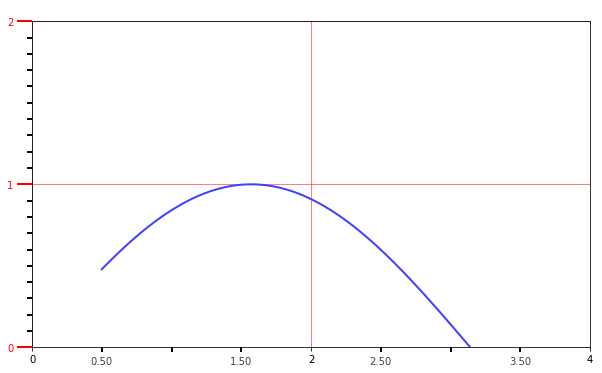

In [75]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import AutoMinorLocator, MultipleLocator, FuncFormatter

x = np.linspace(0.5, 3.5, 100)
y = np.sin(x)

fig = plt.figure(figsize=(10, 6), facecolor='w')
ax = fig.add_subplot(111)

ax.xaxis.set_major_locator(MultipleLocator(2.0))
ax.yaxis.set_major_locator(MultipleLocator(1.0))

ax.xaxis.set_minor_locator(AutoMinorLocator(4))
ax.yaxis.set_minor_locator(AutoMinorLocator(10))

def minor_tick_format(x, pos):
    if not x % 1.0:
        return ''
    return '%.2f' % x

ax.xaxis.set_minor_formatter(FuncFormatter(minor_tick_format))

ax.tick_params('y', which='major', length=15, width=2.0, colors='r')
ax.tick_params(which='minor', length=5, width=2.0, labelsize=10, labelcolor='0.25')

ax.set_xlim(0, 4)
ax.set_ylim(0, 2)

ax.plot(x, y, c=(0.25, 0.25, 1.00), lw=2, zorder=10)
ax.grid(linestyle='-', linewidth=0.5, color='r', zorder=0)

plt.show()

以下代码显示了不同的刻度定位器的用法和输出效果：

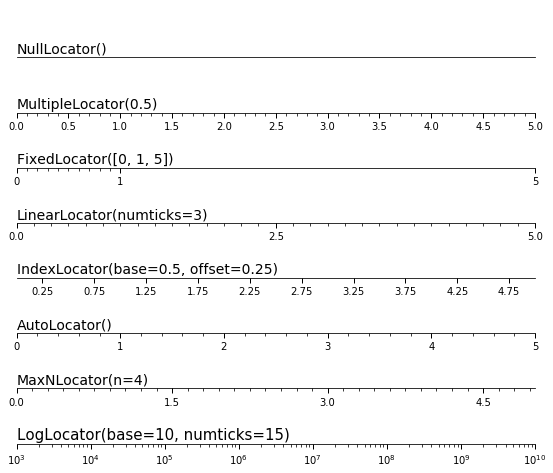

In [170]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker


# Setup a plot such that only the bottom spine is shown
def setup(ax):
    ax.spines['right'].set_color('none')
    ax.spines['left'].set_color('none')
    ax.yaxis.set_major_locator(ticker.NullLocator())
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.tick_params(which='major', width=1.00)
    ax.tick_params(which='major', length=5)
    ax.tick_params(which='minor', width=0.75)
    ax.tick_params(which='minor', length=2.5)
    ax.set_xlim(0, 5)
    ax.set_ylim(0, 1)
    ax.patch.set_alpha(0.0)


plt.figure(figsize=(8, 6), facecolor='w')
n = 8

# Null Locator
ax = plt.subplot(n, 1, 1)
setup(ax)
ax.xaxis.set_major_locator(ticker.NullLocator())
ax.xaxis.set_minor_locator(ticker.NullLocator())
ax.text(0.0, 0.1, "NullLocator()", fontsize=14, transform=ax.transAxes)

# Multiple Locator
ax = plt.subplot(n, 1, 2)
setup(ax)
ax.xaxis.set_major_locator(ticker.MultipleLocator(0.5))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(0.1))
ax.text(0.0, 0.1, "MultipleLocator(0.5)", fontsize=14,
        transform=ax.transAxes)

# Fixed Locator
ax = plt.subplot(n, 1, 3)
setup(ax)
majors = [0, 1, 5]
ax.xaxis.set_major_locator(ticker.FixedLocator(majors))
minors = np.linspace(0, 1, 11)[1:-1]
ax.xaxis.set_minor_locator(ticker.FixedLocator(minors))
ax.text(0.0, 0.1, "FixedLocator([0, 1, 5])", fontsize=14,
        transform=ax.transAxes)

# Linear Locator
ax = plt.subplot(n, 1, 4)
setup(ax)
ax.xaxis.set_major_locator(ticker.LinearLocator(3))
ax.xaxis.set_minor_locator(ticker.LinearLocator(31))
ax.text(0.0, 0.1, "LinearLocator(numticks=3)",
        fontsize=14, transform=ax.transAxes)

# Index Locator
ax = plt.subplot(n, 1, 5)
setup(ax)
ax.plot(range(0, 5), [0]*5, color='white')
ax.xaxis.set_major_locator(ticker.IndexLocator(base=.5, offset=.25))
ax.text(0.0, 0.1, "IndexLocator(base=0.5, offset=0.25)",
        fontsize=14, transform=ax.transAxes)

# Auto Locator
ax = plt.subplot(n, 1, 6)
setup(ax)
ax.xaxis.set_major_locator(ticker.AutoLocator())
ax.xaxis.set_minor_locator(ticker.AutoMinorLocator())
ax.text(0.0, 0.1, "AutoLocator()", fontsize=14, transform=ax.transAxes)

# MaxN Locator
ax = plt.subplot(n, 1, 7)
setup(ax)
ax.xaxis.set_major_locator(ticker.MaxNLocator(4))
ax.xaxis.set_minor_locator(ticker.MaxNLocator(40))
ax.text(0.0, 0.1, "MaxNLocator(n=4)", fontsize=14, transform=ax.transAxes)

# Log Locator
ax = plt.subplot(n, 1, 8)
setup(ax)
ax.set_xlim(10**3, 10**10)
ax.set_xscale('log')
ax.xaxis.set_major_locator(ticker.LogLocator(base=10.0, numticks=15))
ax.text(0.0, 0.1, "LogLocator(base=10, numticks=15)",
        fontsize=15, transform=ax.transAxes)

# Push the top of the top axes outside the figure because we only show the
# bottom spine.
plt.subplots_adjust(left=0.05, right=0.95, bottom=0.05, top=1.05)

plt.show()

以下代码显示了不同的刻度格式化器的用法和输出效果：

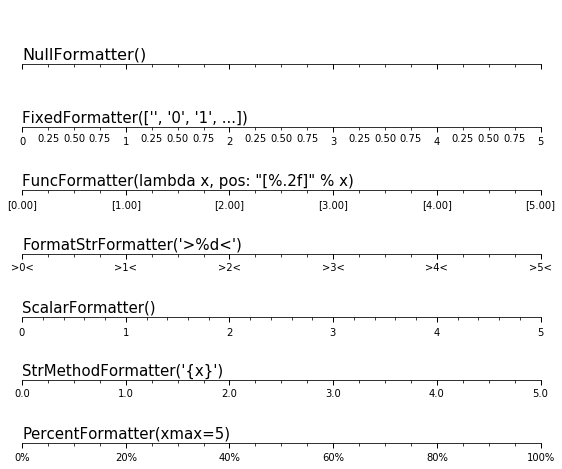

In [168]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker


# Setup a plot such that only the bottom spine is shown
def setup(ax):
    ax.spines['right'].set_color('none')
    ax.spines['left'].set_color('none')
    ax.yaxis.set_major_locator(ticker.NullLocator())
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.tick_params(which='major', width=1.00, length=5)
    ax.tick_params(which='minor', width=0.75, length=2.5, labelsize=10)
    ax.set_xlim(0, 5)
    ax.set_ylim(0, 1)
    ax.patch.set_alpha(0.0)


fig = plt.figure(figsize=(8, 6), facecolor='w')
n = 7

# Null formatter
ax = fig.add_subplot(n, 1, 1)
setup(ax)
ax.xaxis.set_major_locator(ticker.MultipleLocator(1.00))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(0.25))
ax.xaxis.set_major_formatter(ticker.NullFormatter())
ax.xaxis.set_minor_formatter(ticker.NullFormatter())
ax.text(0.0, 0.1, "NullFormatter()", fontsize=16, transform=ax.transAxes)

# Fixed formatter
ax = fig.add_subplot(n, 1, 2)
setup(ax)
ax.xaxis.set_major_locator(ticker.MultipleLocator(1.0))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(0.25))
majors = ["", "0", "1", "2", "3", "4", "5"]
ax.xaxis.set_major_formatter(ticker.FixedFormatter(majors))
minors = [""] + ["%.2f" % (x-int(x)) if (x-int(x))
                 else "" for x in np.arange(0, 5, 0.25)]
ax.xaxis.set_minor_formatter(ticker.FixedFormatter(minors))
ax.text(0.0, 0.1, "FixedFormatter(['', '0', '1', ...])",
        fontsize=15, transform=ax.transAxes)


# FuncFormatter can be used as a decorator
@ticker.FuncFormatter
def major_formatter(x, pos):
    return "[%.2f]" % x


ax = fig.add_subplot(n, 1, 3)
setup(ax)
ax.xaxis.set_major_locator(ticker.MultipleLocator(1.00))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(0.25))
ax.xaxis.set_major_formatter(major_formatter)
ax.text(0.0, 0.1, 'FuncFormatter(lambda x, pos: "[%.2f]" % x)',
        fontsize=15, transform=ax.transAxes)


# FormatStr formatter
ax = fig.add_subplot(n, 1, 4)
setup(ax)
ax.xaxis.set_major_locator(ticker.MultipleLocator(1.00))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(0.25))
ax.xaxis.set_major_formatter(ticker.FormatStrFormatter(">%d<"))
ax.text(0.0, 0.1, "FormatStrFormatter('>%d<')",
        fontsize=15, transform=ax.transAxes)

# Scalar formatter
ax = fig.add_subplot(n, 1, 5)
setup(ax)
ax.xaxis.set_major_locator(ticker.AutoLocator())
ax.xaxis.set_minor_locator(ticker.AutoMinorLocator())
ax.xaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
ax.text(0.0, 0.1, "ScalarFormatter()", fontsize=15, transform=ax.transAxes)

# StrMethod formatter
ax = fig.add_subplot(n, 1, 6)
setup(ax)
ax.xaxis.set_major_locator(ticker.MultipleLocator(1.00))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(0.25))
ax.xaxis.set_major_formatter(ticker.StrMethodFormatter("{x}"))
ax.text(0.0, 0.1, "StrMethodFormatter('{x}')",
        fontsize=15, transform=ax.transAxes)

# Percent formatter
ax = fig.add_subplot(n, 1, 7)
setup(ax)
ax.xaxis.set_major_locator(ticker.MultipleLocator(1.00))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(0.25))
ax.xaxis.set_major_formatter(ticker.PercentFormatter(xmax=5))
ax.text(0.0, 0.1, "PercentFormatter(xmax=5)",
        fontsize=15, transform=ax.transAxes)

# Push the top of the top axes outside the figure because we only show the
# bottom spine.
fig.subplots_adjust(left=0.05, right=0.95, bottom=0.05, top=1.05)

plt.show()

#### 刻度范围和标签
示例代码如下：

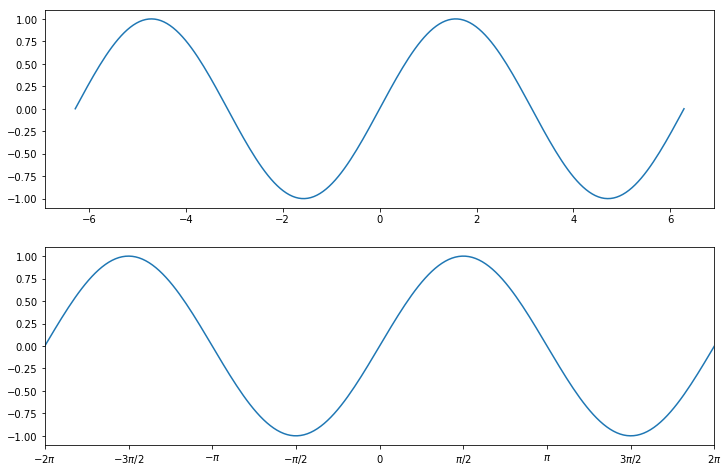

In [76]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-2 * np.pi, 2 * np.pi, 200)
y = np.sin(x)

plt.figure(figsize=(12,8), facecolor='w')

plt.subplot(211)
# 逆序标签
# plt.xlim(2*np.pi, -2*np.pi)
plt.plot(x,y)

plt.subplot(212)
plt.xlim(-2*np.pi, 2*np.pi)
# 逆序标签
# plt.xlim(2*np.pi, -2*np.pi)

ticks = [-2*np.pi, -3*np.pi/2, -1*np.pi, -np.pi /2, 0,
         np.pi/2, np.pi, 3*np.pi/2, 2*np.pi]
tick_labels = [r'$-2\pi$',r'$-3\pi/2$',r'$-\pi$', r'$-\pi/2$', r'$0$', 
               r'$\pi/2$', r'$\pi$', r'$3\pi/2$', r'$2\pi$']
plt.xticks(ticks, tick_labels)

plt.plot(x, y)

plt.show()

可以通过调整xlim()/ylim()函数的参数顺序来逆序设置坐标轴刻度标签。

#### 主要和次要刻度

可以分别为主刻度和次刻度指定不同的定位器和格式化器：

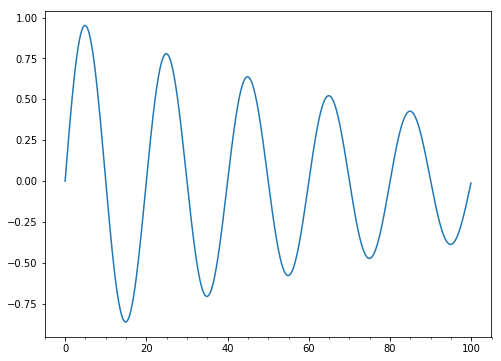

In [181]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)


t = np.arange(0.0, 100.0, 0.1)
s = np.sin(0.1 * np.pi * t) * np.exp(-t * 0.01)

fig, ax = plt.subplots(figsize=(8, 6), facecolor='w')
ax.plot(t, s)

# Make a plot with major ticks that are multiples of 20 and minor ticks that
# are multiples of 5.  Label major ticks with '%d' formatting but don't label
# minor ticks.
ax.xaxis.set_major_locator(MultipleLocator(20))
ax.xaxis.set_major_formatter(FormatStrFormatter('%d'))

# For the minor ticks, use no labels; default NullFormatter.
ax.xaxis.set_minor_locator(MultipleLocator(5))

plt.show()

为次要刻度指定自动定位器，并设置其刻度样式。示例代码如下：

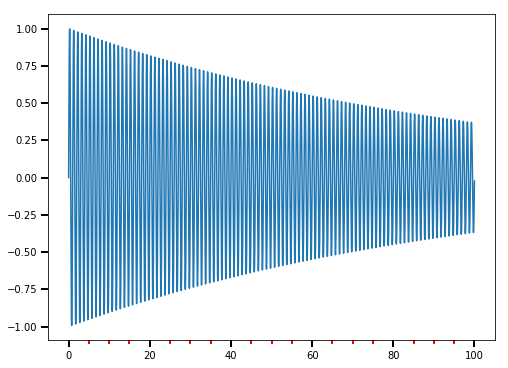

In [183]:
t = np.arange(0.0, 100.0, 0.01)
s = np.sin(2 * np.pi * t) * np.exp(-t * 0.01)

fig, ax = plt.subplots(figsize=(8, 6), facecolor='w')
ax.plot(t, s)

ax.xaxis.set_minor_locator(AutoMinorLocator())

ax.tick_params(which='both', width=2)
ax.tick_params(which='major', length=7)
ax.tick_params(which='minor', length=4, color='r')

plt.show()

#### 案例
1. 定制标签和刻度线样式

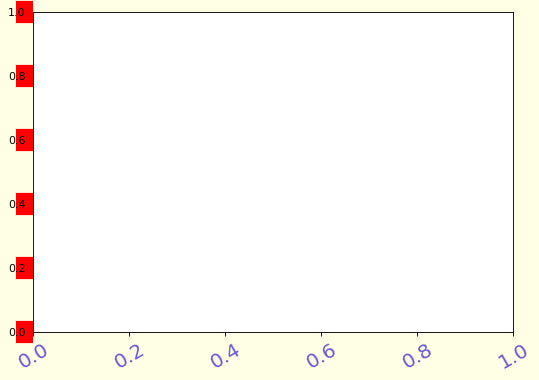

In [78]:
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize=(12, 8), dpi=80, facecolor=(1.0, 1.0, 0.9))
ax = fig.add_axes([0.1, 0.4, 0.5, 0.5])

for tick_label in ax.xaxis.get_ticklabels():
    tick_label.set_color('slateblue')
    tick_label.set_fontsize(18)
    tick_label.set_rotation(30)
    
for tick_line in ax.yaxis.get_ticklines():
    tick_line.set_color('r')
    tick_line.set_markersize(15)
    tick_line.set_markeredgewidth(20)
    
plt.show()

2. 货币和时间序列样式的刻度标签

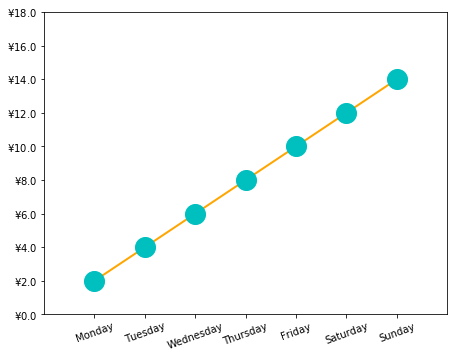

In [190]:
import matplotlib.pyplot as plt
import numpy as np

from calendar import month_name, day_name
from matplotlib.ticker import FormatStrFormatter

fig = plt.figure(figsize=(8, 6), facecolor='w')

ax = fig.add_axes([0.2, 0.2, 0.7, 0.7])

x = np.arange(1, 8, 1)
y = 2 * x

ax.plot(x, y, ls='-', lw=2, color='orange', marker='o', ms=20, mfc='c', mec='c')
ax.yaxis.set_major_formatter(FormatStrFormatter(r'$\yen%1.1f$'))
plt.xticks(x, day_name[0:7], rotation=20)

ax.set_xlim(0, 8)
ax.set_ylim(0, 18)

plt.show()

### 3.3 坐标轴高阶应用

#### 位置和展示形式

1. 任意位置添加任意数量的坐标轴

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(8, 8), facecolor='w')
plt.axes([0.3, 0.1, 0.3, 0.3], frameon=True)
plt.plot(np.arange(3), [0, 1, 0], color='b', lw=2, ls='--')

plt.axes([0.3, 0.5, 0.3, 0.3], frameon=True)
plt.plot(2 + np.arange(3), [0, 1, 0], color='r', lw=2, ls='-')

plt.axes([0.3, 0.9, 0.3, 0.3], frameon=True)
plt.plot(2 + np.arange(3), [0, 1, 0], color='g', lw=2, ls=':')

plt.show()

2. 调整坐标轴的显示、隐藏与刻度范围

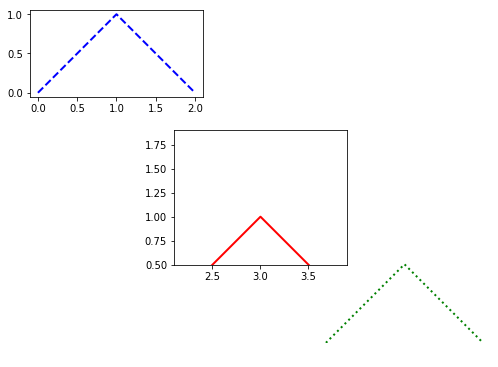

In [212]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(8, 8), facecolor='w')
plt.axes([0.05, 0.5, 0.3, 0.3], frameon=True, aspect='equal')
plt.plot(np.arange(3), [0, 1, 0], color='b', lw=2, ls='--')
plt.ylim(0, 1.0)
plt.axis('image')

plt.axes([0.3, 0.25, 0.3, 0.3], frameon=True, aspect='equal')
plt.plot(2 + np.arange(3), [0, 1, 0], color='r', lw=2, ls='-')
plt.ylim(0, 15)
plt.axis([2.1, 3.9, 0.5, 1.9])

plt.axes([0.55, 0.1, 0.3, 0.3], frameon=True, aspect='equal')
plt.plot(2 + np.arange(3), [0, 1, 0], color='g', lw=2, ls=':')
plt.ylim(0, 1.5)
plt.axis('off')

plt.show()

#### 控制刻度的显示

1. 面向对象的方式

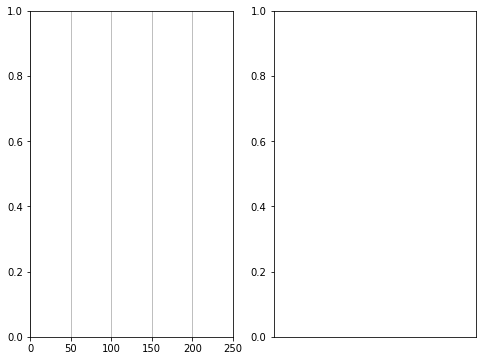

In [214]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6), facecolor='w')

ax1 = plt.subplot(121)
ax1.set_xticks(range(0, 251, 50))
plt.grid(True, axis='x')

ax2 = plt.subplot(122)
ax2.set_xticks([])
plt.grid(True, axis='x')

plt.show()

2. Matlab命令风格

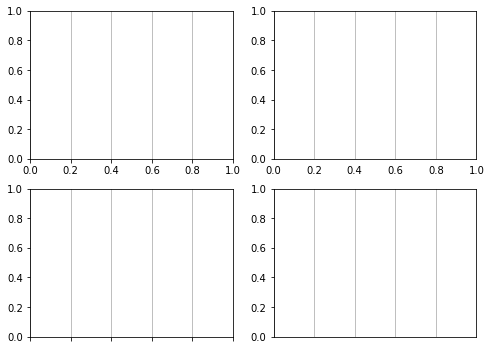

In [216]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6), facecolor='w')

ax1 = plt.subplot(221)
plt.setp(ax1.get_xticklabels(), visible=True)
plt.setp(ax1.get_xticklines(), visible=True)
plt.grid(True, axis='x')

ax2 = plt.subplot(222)
plt.setp(ax2.get_xticklabels(), visible=True)
plt.setp(ax2.get_xticklines(), visible=False)
plt.grid(True, axis='x')

ax3 = plt.subplot(223)
plt.setp(ax3.get_xticklabels(), visible=False)
plt.setp(ax3.get_xticklines(), visible=True)
plt.grid(True, axis='x')

ax4 = plt.subplot(224)
plt.setp(ax4.get_xticklabels(), visible=False)
plt.setp(ax4.get_xticklines(), visible=False)
plt.grid(True, axis='x')

plt.show()

#### 控制坐标轴的显示

控制坐标轴显示主要是通过控制坐标轴的载体（轴脊,spines）的显示来实现的，轴脊上有刻度标签和刻度线，它们共同组成了坐标轴。因此，可以通过控制轴脊及其刻度线的显示来实现对坐标轴显示的控制。

示例代码如下：

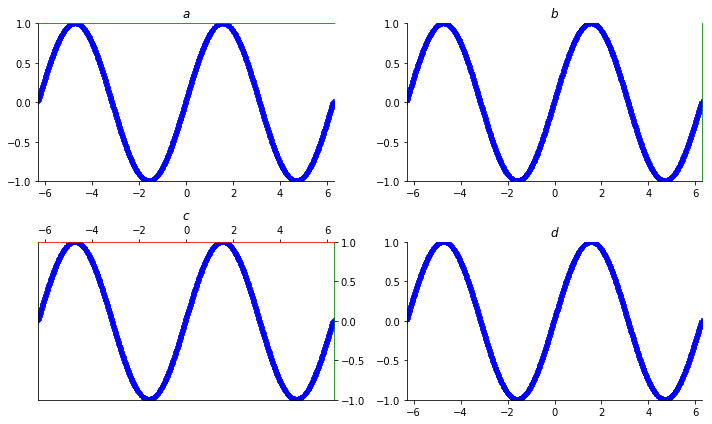

In [100]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-2 * np.pi, 2 * np.pi, 1000)
y = np.sin(x)

plt.figure(figsize=(10, 6), facecolor='w')

ax1 = plt.subplot(221)
ax1.spines['right'].set_color('none')
ax1.spines['top'].set_color('r')
ax1.set_xlim(-2 * np.pi, 2 * np.pi)
ax1.set_ylim(-1.0, 1.0)
plt.title(r'$a$')
plt.scatter(x, y, marker='+', color='b')

ax2 = plt.subplot(222)
ax2.spines['right'].set_color('g')
ax2.spines['top'].set_color('none')
ax2.xaxis.set_ticks_position('bottom')
ax2.set_xlim(-2 * np.pi, 2 * np.pi)
ax2.set_ylim(-1.0, 1.0)
plt.title(r'$b$')
plt.scatter(x, y, marker='+', color='b')

ax3 = plt.subplot(223)
ax3.spines['right'].set_color('g')
ax3.spines['top'].set_color('r')
ax3.xaxis.set_ticks_position('top')
ax3.yaxis.set_ticks_position('right')
ax3.set_xlim(-2 * np.pi, 2 * np.pi)
ax3.set_ylim(-1.0, 1.0)
plt.title(r'$c$')
plt.scatter(x, y, marker='+', color='b')

ax4 = plt.subplot(224)
ax4.spines['right'].set_color('none')
ax4.spines['top'].set_color('none')
ax4.xaxis.set_ticks_position('bottom')
ax4.yaxis.set_ticks_position('left')
ax4.set_xlim(-2 * np.pi, 2 * np.pi)
ax4.set_ylim(-1.0, 1.0)
plt.title(r'$d$')
plt.scatter(x, y, marker='+', color='b')

plt.tight_layout()

plt.show()

#### 移动坐标轴（脊）

可以通过移动轴脊实现对坐标轴的移动。代码如下：

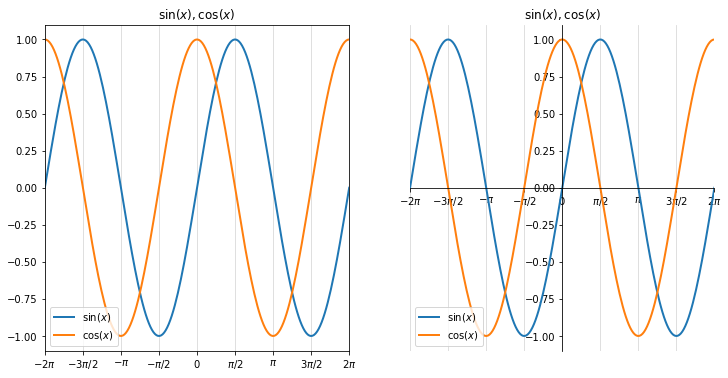

In [103]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-2 * np.pi, 2 * np.pi, 200)
y1 = np.sin(x)
y2 = np.cos(x)

ticks = [-2*np.pi, -3*np.pi/2, -1*np.pi, -np.pi /2, 0,
         np.pi/2, np.pi, 3*np.pi/2, 2*np.pi]
tick_labels = [r'$-2\pi$',r'$-3\pi/2$',r'$-\pi$', r'$-\pi/2$', r'$0$', 
               r'$\pi/2$', r'$\pi$', r'$3\pi/2$', r'$2\pi$']
plt.figure(figsize=(12, 6), facecolor='w')

ax1 = plt.subplot(121)
ax1.plot(x, y1, ls='-', lw=2, label='$\sin(x)$')
ax1.plot(x, y2, ls='-', lw=2, label='$\cos(x)$')
ax1.legend(loc='lower left')

ax1.set_xlim(-2*np.pi, 2 * np.pi)
ax1.set_xticks(ticks)
ax1.set_xticklabels(tick_labels)
plt.grid(True, axis='x', alpha=0.5)
plt.title('$\sin(x),\cos(x)$')

ax2 = plt.subplot(122)
ax2.plot(x, y1, ls='-', lw=2, label='$\sin(x)$')
ax2.plot(x, y2, ls='-', lw=2, label='$\cos(x)$')
ax2.legend(loc='lower left')

ax2.set_xlim(-2*np.pi, 2 * np.pi)
ax2.set_xticks(ticks)
ax2.set_xticklabels(tick_labels)
plt.grid(True, axis='x', alpha=0.5)
plt.title('$\sin(x),\cos(x)$')

# 移动坐标轴
ax2.spines['right'].set_color('none')
ax2.spines['top'].set_color('none')
ax2.spines['bottom'].set_position('center')
ax2.spines['left'].set_position('zero')

plt.show()

In [101]:
help(ax2.spines['left'].set_position)

Help on method set_position in module matplotlib.spines:

set_position(position) method of matplotlib.spines.Spine instance
    set the position of the spine
    
    Spine position is specified by a 2 tuple of (position type,
    amount). The position types are:
    
    * 'outward' : place the spine out from the data area by the
      specified number of points. (Negative values specify placing the
      spine inward.)
    
    * 'axes' : place the spine at the specified Axes coordinate (from
      0.0-1.0).
    
    * 'data' : place the spine at the specified data coordinate.
    
    Additionally, shorthand notations define a special positions:
    
    * 'center' -> ('axes',0.5)
    * 'zero' -> ('data', 0.0)



#### 案例

1. 定制棉棒图

2. 定制坐标轴样式和位置

### 3.4 注解的添加与修改

#### 添加注解

注解可分为有指示注解和无指示注解。有指示注解的添加主要是通过annotate()函数来实现的, 而无指示注解通常是通过text()函数实现的。代码示例如下：

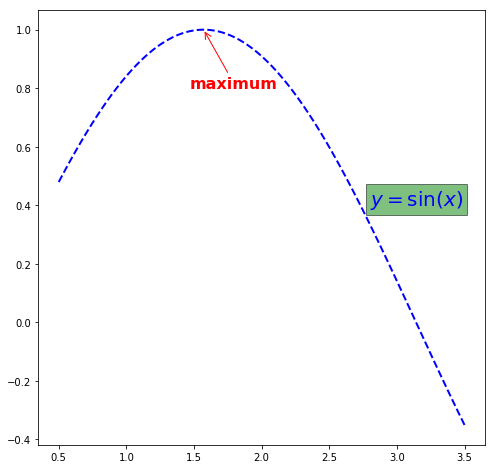

In [134]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0.5, 3.5, 100)
y = np.sin(x)

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)

ax.plot(x, y, c='b', ls='--', lw=2)

# 有指示注解
ax.annotate('maximum', xy=(np.pi/2, 1.0), xycoords='data', 
            xytext=(np.pi/2 - 0.1, 0.8), textcoords='data', 
            weight='bold', color='r', fontsize=16,
            arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='r'))
# 无指示注解
ax.text(2.8, 0.4, '$y=\sin(x)$', fontsize=20, color='b', 
        bbox=dict(facecolor='g', alpha=0.5))

plt.show()

#### 修改注解

要修改注解，只需在添加或创建注解时通过一个变量获得annotate()和text()返回的注解对象即可。如：

In [139]:
# 有指示注解
annotate = ax.annotate('maximum', xy=(np.pi/2, 1.0), xycoords='data', 
            xytext=(np.pi/2 - 0.1, 0.8), textcoords='data', 
            weight='bold', color='r', fontsize=16,
            arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='r'))
# 无指示注解
text = ax.text(2.8, 0.4, '$y=\sin(x)$', fontsize=20, color='b', 
        bbox=dict(facecolor='g', alpha=0.5))

annotate.get_text(), annotate.get_rotation(), text.get_text, text.get_fontsize()

('maximum',
 0.0,
 <bound method Text.get_text of Text(2.8, 0.4, '$y=\\sin(x)$')>,
 20.0)

然后通过对象的方法和属性即可修改注解，如：

In [140]:
annotate.set_color('b')
annotate.set_rotation(30)

text.set_text('sine curve:$y=\sin(x)$')
text.set_fontsize(16)

annotate.get_text(), annotate.get_rotation(), text.get_text, text.get_fontsize()

('maximum',
 30.0,
 <bound method Text.get_text of Text(2.8, 0.4, 'sine curve:$y=\\sin(x)$')>,
 16.0)

#### 案例

1. 圆角文本框

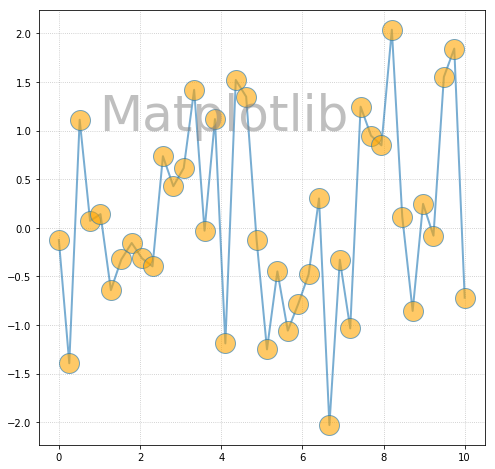

In [24]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0.0, 10, 40)
y = np.random.randn(40)

plt.figure(figsize=(8,8))

plt.plot(x, y, ls='-', lw=2, marker='o', ms=20, mfc='orange', alpha=0.6)
plt.grid(ls=':', color='gray', alpha=0.5)

text = plt.text(1, 1, 'Matplotlib', size=50, color='gray')

#text.set_bbox(dict(boxstyle='round', ec='#8968CD', fc='#FEE1FF'))
#text.set_rotation(30)
text.set_alpha(0.5)

plt.show()

2. 圆角有指示注解

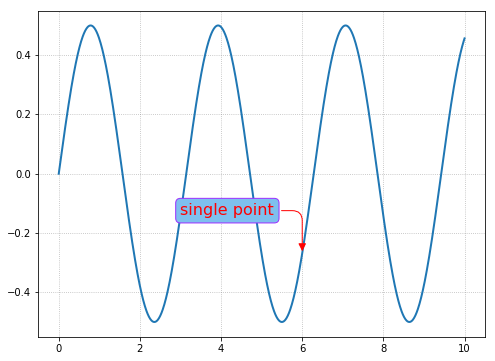

In [157]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0.0, 10, 1000)
y = np.sin(x) * np.cos(x)

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)

ax.plot(x, y, ls='-', lw=2)

bbox=dict(boxstyle='round', fc='#7EC0EE', ec='#9B30FF')
arrowprops = dict(arrowstyle='-|>', 
                  connectionstyle='angle, angleA=0, angleB=90, rad=10', 
                  color='r')

ax.annotate('single point', (6, np.sin(6)*np.cos(6)), 
            xytext=(3, np.sin(3)*np.cos(3)), 
            fontsize=16, color='r', bbox=bbox, arrowprops=arrowprops)

ax.grid(ls=':', color='gray', alpha=0.6)

plt.show()

## 4. 样式表和全局参数

可以使用样式表和rcParams参数字典对Matplotlib的默认样式和全局参数进行定制。

### 4.1 样式表

matplotlib.style增加了易于切换的绘图样式表的支持

#### 内置样式表

除了默认样式，matplotlib提供了以下预定义样式表（可通过matplotlib.style.available属性查看）：

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.style.available

['seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-ticks',
 'fivethirtyeight',
 'seaborn-whitegrid',
 'classic',
 '_classic_test',
 'fast',
 'seaborn-talk',
 'seaborn-dark-palette',
 'seaborn-bright',
 'seaborn-pastel',
 'grayscale',
 'seaborn-notebook',
 'ggplot',
 'seaborn-colorblind',
 'seaborn-muted',
 'seaborn',
 'Solarize_Light2',
 'seaborn-paper',
 'bmh',
 'tableau-colorblind10',
 'seaborn-white',
 'dark_background',
 'seaborn-poster',
 'seaborn-deep']

可使用plt.style.use()方法使用这些样式表。如：

In [26]:
plt.style.use('ggplot')

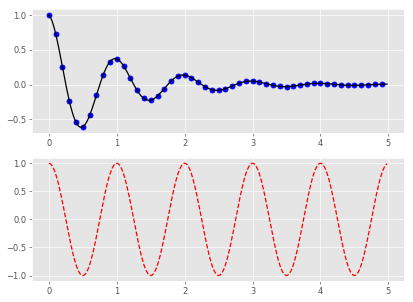

In [27]:
def f(t):
    return np.exp(-t) * np.cos(2*np.pi*t)

t1 = np.arange(0.0, 5.0, 0.1)
t2 = np.arange(0.0, 5.0, 0.02)

plt.figure(figsize=(8,6), dpi=60)
plt.subplot(211)
plt.plot(t1, f(t1), 'bo', t2, f(t2), 'k')

plt.subplot(212)
plt.plot(t2, np.cos(2*np.pi*t2), 'r--')
plt.show()

#### 自定义样式表
可通过调用plt.style.use()方法传入样式表的路径或URL来使用自定义样式表。例如：

In [60]:
!cat mpl_styles/my.mplstyle

axes.titlesize : 24
axes.labelsize : 20
axes.facecolor : green
lines.linewidth : 3
lines.markersize : 10
xtick.labelsize : 16
ytick.labelsize : 16
figure.facecolor: lightgray
figure.edgecolor: red
grid.color: yellow

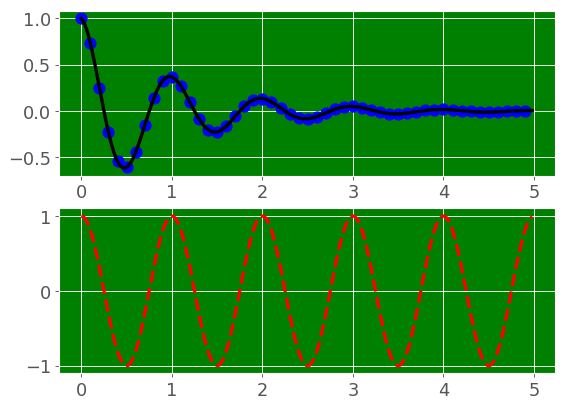

In [28]:
plt.style.use('mpl_styles/my.mplstyle')
plt.figure(figsize=(8,6), dpi=80)
plt.subplot(211)
plt.plot(t1, f(t1), 'bo', t2, f(t2), 'k')

plt.subplot(212)
plt.plot(t2, np.cos(2*np.pi*t2), 'r--')
plt.show()

#### 组合样式表

可以通过传递样式表名称或文件名的列表组合这些样式表，pyplot将按照顺序应用这些样式。如：

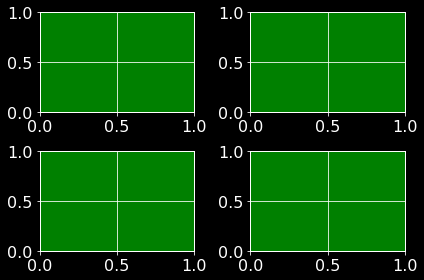

In [30]:
plt.style.use(['dark_background', 'mpl_styles/my.mplstyle'])
fig, axs = plt.subplots(2, 2)  # a figure with a 2x2 grid of Axe
fig.tight_layout()
plt.show()

#### 临时套用样式表
如果只想为特定代码块使用样式但不想更改全局样式，可通过样式的上下文管理器将样式限制为特定范围：

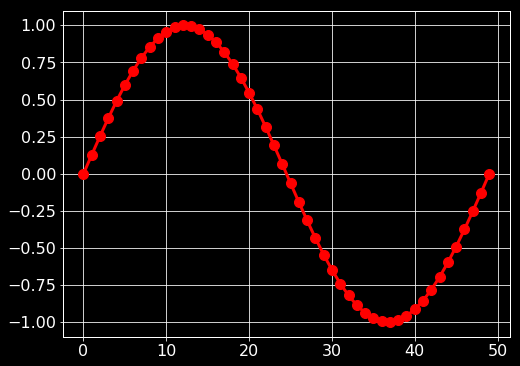

In [54]:
with plt.style.context('dark_background'):
    plt.plot(np.sin(np.linspace(0, 2 * np.pi)), 'r-o')
plt.show()

### 4.2 全局参数

#### 使用rcParams设置全局参数
可以在python脚本中动态更改默认的rc设置，或者从python shell以交互方式更改。 所有rc设置都存储在一个名为matplotlib.rcParams的类字典变量中，该变量对于matplotlib包是全局的。 rcParams可以直接修改，例如：

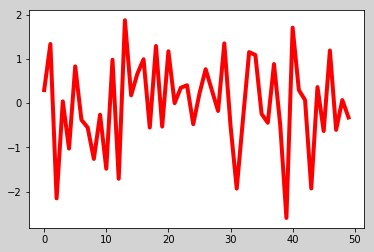

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rcParams['figure.facecolor'] = 'lightgray'
mpl.rcParams['axes.facecolor'] = 'white'
mpl.rcParams['lines.linewidth'] = 4
mpl.rcParams['lines.color'] = 'r'

data = np.random.randn(50)
lines = plt.plot(data)
lines[0].set_color('r')
plt.show()

In [15]:
lines[0].get_color()

'#1f77b4'

也可以使用matplotlib.rc()命令及其关键字参数一次设置单个组（按图表元素类型分组）中的多个属性。如：

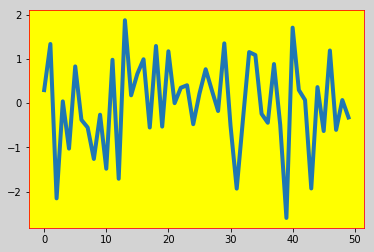

In [19]:
# 设置子图的背景色和边框颜色
mpl.rc('axes', facecolor='yellow', edgecolor='r')
plt.plot(data)
plt.show()

#### 编辑matplotlibrc文件设置全局参数
matplotlib使用matplotlibrc配置文件来自定义各种属性，称为rc设置或rc参数。该文件可以控制matplotlib中几乎每个属性的默认值：图形大小和dpi，线宽，颜色和样式，子图、轴和网格属性，文本和字体属性等。
可以通过以下命令查看当前所使用的matplotlibrc文件的路径：

In [8]:
mpl.matplotlib_fname()

'/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/matplotlibrc'

#### 案例：设置中文字体

Matplotlib 默认情况不支持中文，可以使用以下简单的方法来解决：
1. 下载中文字体，如[SimHei](https://www.fontpalace.com/font-details/SimHei/)
2. 将字体文件复制到指定目录下，如[fonts](./fonts)目录
3. 使用matplotlib的字体管理器创建字体属性。示例代码如下：

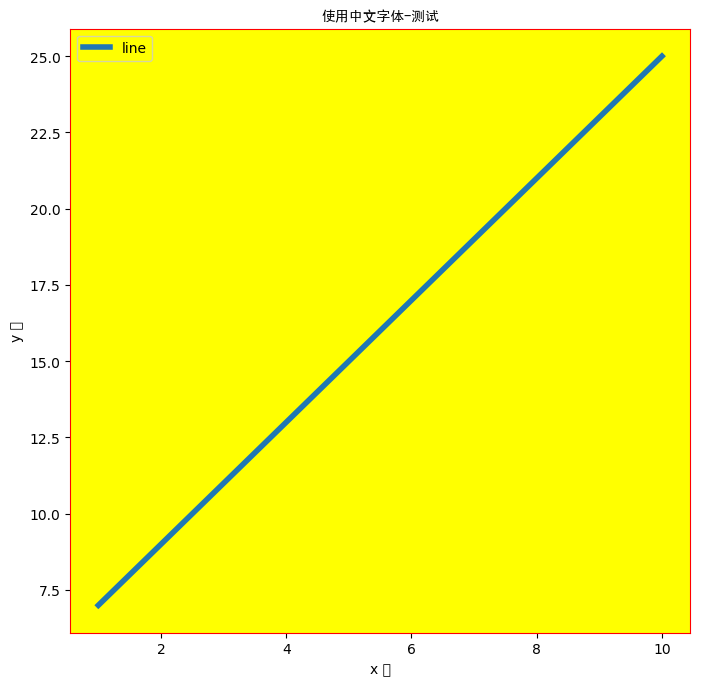

In [23]:
import numpy as np 
from matplotlib import pyplot as plt 
import matplotlib as mpl

mpl.rc('figure', facecolor='w')
# fname字体文件的路径
zhfont_simhei = mpl.font_manager.FontProperties(fname="fonts/SimHei.ttf") 
 
x = np.arange(1,11) 
y =  2  * x +  5

plt.figure(figsize=(8,8), dpi=100)
plt.title("使用中文字体-测试", fontproperties=zhfont_simhei) 
 
# fontproperties 设置中文显示，fontsize 设置字体大小
plt.xlabel("x 轴")
plt.ylabel("y 轴")

plt.plot(x,y, label="line")

plt.legend()

plt.show()

也可以使用系统字体：

In [24]:
fonts = sorted([f.name for f in mpl.font_manager.fontManager.ttflist])
fonts

['.Keyboard',
 '.LastResort',
 '.SF Compact Display',
 '.SF Compact Display',
 '.SF Compact Display',
 '.SF Compact Display',
 '.SF Compact Display',
 '.SF Compact Display',
 '.SF Compact Display',
 '.SF Compact Display',
 '.SF Compact Display',
 '.SF Compact Rounded',
 '.SF Compact Rounded',
 '.SF Compact Rounded',
 '.SF Compact Rounded',
 '.SF Compact Rounded',
 '.SF Compact Rounded',
 '.SF Compact Rounded',
 '.SF Compact Rounded',
 '.SF Compact Rounded',
 '.SF Compact Text',
 '.SF Compact Text',
 '.SF Compact Text',
 '.SF Compact Text',
 '.SF Compact Text',
 '.SF Compact Text',
 '.SF Compact Text',
 '.SF Compact Text',
 '.SF Compact Text',
 '.SF Compact Text',
 '.SF Compact Text',
 '.SF Compact Text',
 '.SF NS Display Condensed',
 '.SF NS Display Condensed',
 '.SF NS Display Condensed',
 '.SF NS Display Condensed',
 '.SF NS Display Condensed',
 '.SF NS Display Condensed',
 '.SF NS Display Condensed',
 '.SF NS Display Condensed',
 '.SF NS Display Condensed',
 '.SF NS Text Condensed',

In [57]:
plt.rcParams['font.family']=['Times New Roman']
plt.rcParams['font.size'] = 16

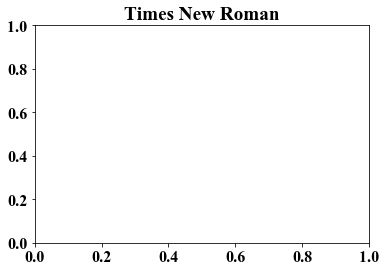

In [58]:
plt.title('Times New Roman')
plt.show()